## Introduction

<p><strong>Life Expectancy.</strong>
<p>Life expectancy refers to the number of years a person is expected to live based on the statistical average. Life expectancy varies by geographical area and by era. In the Bronze age, for example, life expectancy was 26 years, while in 2010, it was 67 years. </p>
<p>The life expectancy for a particular person or population group depends on several variables such as their lifestyle, access to healthcare, diet, economical status and the relevant mortality and morbidity data.</p>
<p>However, as life expectancy is calculated based on averages, a person may live for many years more or less than expected. </p>

<p><strong>Business Problem.</strong> Your task is to find the factors that affect the life expectancy, format the given data by: data cleaning via , detecting, filling and removing null-values, treating outliers, providing visualizations and Feature Engineering that would answer the specific questions the client has, which are mentioned below.</p>

<p><strong>Analytical Context.</strong> You are given a CSV file (stored in the already created <code>data</code> folder) containing details about life expectancy like Country, BMI, population, GDP, Adult mortality, Infant mortality, Status etc. You will be performing the following tasks on the data:</p>
<ol>
<li>Read, transform, and prepare data for visualization</li>
<li>Perform analytics and construct visualizations of the data to identify patterns in the dataset</li>
</ol>
<p>The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:</p>
<ol>
<li>Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?</li>
<li>How does Infant and Adult mortality rates affect life expectancy?</li>
<li>What is the impact of schooling on the lifespan of humans?</li>
<li>Should a country having a lower life expectancy value increase its healthcare expenditure in order to improve its average lifespan? </li>
<li>Does Life Expectancy have positive or negative relationship with drinking alcohol?</li>
<li>Do densely populated countries tend to have lower life expectancy? </li>
<li>What is the impact of Immunization coverage on life Expectancy?</li>
</ol>

### Import required libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot, plot
init_notebook_mode(connected=True)


from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings 
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

### Load and read the dataset

In [68]:
countries = pd.read_csv('./Data/Metadata_Country.csv',encoding='latin1')
life_expectancy = pd.read_csv('./Data/Life Expectancy Data.csv')

### Variable definition

Country- Country
Year- Year
Status- Developed or Developing status
Life Expectancy- Age(years)
Adult Mortality- Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population)
Infant Deaths- Number of Infant Deaths per 1000 population
Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)
Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%)
Measles- number of reported measles cases per 1000 population
BMI- Average Body Mass Index of entire population
U-5 Deaths- Number of under-five deaths per 1000 population
Polio- Polio(Pol3) immunization coverage among 1-year-olds(%)
Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%)
Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%)
HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years)
GDP- Gross Domestic Product per capita(in USD)
Population- Population
Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19(%)
Thinness 5-9- Prevalence of thinness among children for Age 5 to 9(%)
Income Composition- Human Development Index in terms of income composition of resources(0-1)
Schooling- Number of years of Schooling

In [69]:
# Let us load first five observations of our dataset.
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [70]:
# Replace the columns with lower case letter and connect the words with _
columns = [col.lower().strip().replace(' ', '_') for col in life_expectancy.columns]
life_expectancy.columns = columns

In [71]:
# Let us reload first five observations of our dataset again.
life_expectancy.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [72]:
countries.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola


In [73]:
# Replace the name TableName to country and change to lowercase 
countries.rename({'TableName':'country'}, axis = 1,inplace=True)
columns = [col.lower().strip().replace(' ', '_') for col in countries.columns]
countries.columns = columns

In [74]:
countries.head()

,country_code,region,incomegroup,specialnotes,country
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola


In [75]:
# lets observe the number of rows and columns in the dataset
print(f'Life expectancy datasets consist of {life_expectancy.shape[0]} rows and {life_expectancy.shape[1]} columns')

Life expectancy datasets consist of 2938 rows and 22 columns


In [76]:
#  describe the data with pandas.describe
life_expectancy.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [77]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [78]:
cat_features = life_expectancy.select_dtypes(include = [np.object])
num_features = life_expectancy.select_dtypes(include = [np.number])
cat_cols = cat_features.columns
num_cols = num_features.columns
print(f'There are {len(cat_cols)} categorical features and {len(num_cols)} numerical features in the life expectancy dataset')

There are 2 categorical features and 20 numerical features in the life expectancy dataset


In [79]:
# check for categorical cols and their uniqueness
for col in life_expectancy.columns:
    if life_expectancy[col].dtypes== 'O':
        print(f'Feature {col} has {life_expectancy[col].nunique()} unique variables')

Feature country has 193 unique variables
Feature status has 2 unique variables


In [80]:
# check for null value
life_expectancy.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [81]:
## uniqueness of the country feature in the life expectancy
life_expectancy.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [82]:
## uniqueness of the country feature in the countries dataset
countries.country.unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curaçao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Alge

In [83]:
## len of the uniquness of country feature in the life expectancy dataset
life_expectancy.country.nunique()

193

In [84]:
## len of the uniquness of country feature in the countries dataset
countries.country.nunique()

265

In [85]:
## replace conflicting names of country to join the countries
life_expectancy['country'] = life_expectancy['country'].replace({'Iran (Islamic Republic of)': 'Iran',"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",
'The former Yugoslav republic of Macedonia':'North Macedonia', 'Netherlands Antilles': 'Netherlands', "Democratic People's Republic of Korea": 'North Korea', 'Republic of Korea': 'South Korea',
'Swaziland': 'Eswatini', 'Micronesia (Federated States of)': "Micronesia", 'Czechia': 'Czech Republic','Republic of Korea': 'South Korea',
'United Republic of Tanzania':'Tanzania', 'Venezuela (Bolivarian Republic of)': 'Venezuela','Viet Nam': 'Vietnam','Republic of Moldova':'Moldova',
      'Bolivia (Plurinational State of)': 'Bolivia'})

In [86]:
## replace conflicting names of country to join the life expectancy dataset
countries['country'] = countries['country'].replace({ "United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
 'Congo, Rep.': 'Congo', "Korea, Dem. People's Rep.": 'North Korea', 'Iran, Islamic Rep.': 'Iran','Micronesia, Fed. Sts.':"Micronesia",
  'Lao PDR': "Lao People's Democratic Republic", 'São Tomé and Principe':'Sao Tome and Principe',
  'Korea, Rep.': 'South Korea', 'St. Lucia': 'Saint Lucia','St. Kitts and Nevis':'Saint Kitts and Nevis','St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
  'Tanzania, United Republic of':'Tanzania', 'Kyrgyz Republic': 'Kyrgyzstan', 'Slovak Republic':'Slovakia',
  'Venezuela, RB': 'Venezuela', 'Bahamas, The':'Bahamas','Yemen, Rep.': 'Yemen', 'Egypt, Arab Rep.': 'Egypt',
                                                     'Gambia, The':'Gambia'
 })

In [91]:
df = life_expectancy.set_index('country').join(countries[['region', 'incomegroup','country']].set_index('country'))
df.drop_duplicates(inplace = True)
df.reset_index(drop = True)
df

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,region,incomegroup
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,South Asia,Low income
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,South Asia,Low income
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,South Asia,Low income
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,South Asia,Low income
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Sub-Saharan Africa,Lower middle income
Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Sub-Saharan Africa,Lower middle income
Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Sub-Saharan Africa,Lower middle income


In [93]:
df.reset_index(inplace = True)

In [94]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'region', 'incomegroup'],
      dtype='object')

In [95]:
df =  df[df.region.notnull()]

In [96]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      8
adult_mortality                      8
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                446
population                         650
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    165
schooling                          161
region                               0
incomegroup                         16
dtype: int64

In [97]:
df.incomegroup.value_counts()

Lower middle income    864
High income            821
Upper middle income    803
Low income             432
Name: incomegroup, dtype: int64

In [98]:
df.columns


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'region', 'incomegroup'],
      dtype='object')

In [99]:
df[df['incomegroup'].isnull()]['country']

2858    Venezuela
2859    Venezuela
2860    Venezuela
2861    Venezuela
2862    Venezuela
2863    Venezuela
2864    Venezuela
2865    Venezuela
2866    Venezuela
2867    Venezuela
2868    Venezuela
2869    Venezuela
2870    Venezuela
2871    Venezuela
2872    Venezuela
2873    Venezuela
Name: country, dtype: object

In [100]:
## fill incomegroup of Venezuela with Upper middle income according to report FIGO 2021 
## (World congress of Gynecolgy and Obstreics)
df.incomegroup.fillna('Upper middle income', inplace = True)

In [101]:
df.incomegroup.value_counts()

Lower middle income    864
High income            821
Upper middle income    819
Low income             432
Name: incomegroup, dtype: int64

In [102]:
df[df.population.isnull()]['country'].value_counts()

Antigua and Barbuda                 16
Singapore                           16
New Zealand                         16
North Korea                         16
North Macedonia                     16
Oman                                16
Qatar                               16
Saint Lucia                         16
Saint Vincent and the Grenadines    16
Saudi Arabia                        16
Slovakia                            16
Micronesia                          16
Somalia                             16
South Korea                         16
Tanzania                            16
United Arab Emirates                16
United Kingdom                      16
United States                       16
Venezuela                           16
Vietnam                             16
Bahamas                             16
Moldova                             16
Yemen                               16
Congo                               16
Czech Republic                      16
Côte d'Ivoire            

In [103]:
df[df['country']== 'Kuwait'][['year', 'population']]

,year,population
1394,2015,NaN
1395,2014,NaN
1396,2013,NaN
1397,2012,NaN
1398,2011,NaN
1399,2010,NaN
1400,2009,NaN
1401,2008,NaN
1402,2007,NaN
1403,2006,NaN


In [104]:
pop_null_countries = df[df.population.isnull()]['country'].value_counts().index

In [105]:
df[df.gdp.isnull()]['country'].value_counts()

Bahamas                             16
Micronesia                          16
Vietnam                             16
Venezuela                           16
United States                       16
United Kingdom                      16
Tanzania                            16
South Korea                         16
Slovakia                            16
Saint Vincent and the Grenadines    16
Saint Lucia                         16
Bolivia                             16
North Korea                         16
Moldova                             16
North Macedonia                     16
Gambia                              16
Iran                                16
Congo                               16
Czech Republic                      16
Côte d'Ivoire                       16
Democratic Republic of the Congo    16
Egypt                               16
Yemen                               16
Kyrgyzstan                          16
Lao People's Democratic Republic    16
Somalia                  

In [106]:
gdp_null_countries = df[df.gdp.isnull()]['country'].value_counts().index

In [107]:
## Population and GDP data from world bank dataset
population = pd.read_csv('./Data/Population data.csv', skiprows= 4)
population = population.loc[:, ~population.columns.str.contains('^Unnamed')]
gdp = pd.read_csv('./Data/GDP data.csv',skiprows= 4)
gdp = gdp.loc[:, ~gdp.columns.str.contains('^Unnamed')]

In [108]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [109]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.836769,147.238537,156.426780,182.521139,162.594548,180.489043,...,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473,1534.171767,1485.307425,1330.140232
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,...,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869


In [110]:
id_variables = ['Indicator Name', 'Country Name', 'Country Code','Indicator Code']
pop = pd.melt(population, id_vars= id_variables, var_name='Year', value_name='Population')
gdp = pd.melt(gdp, id_vars= id_variables, var_name='Year', value_name='GDP')

In [111]:
pop.head()

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Population
0,"Population, total",Aruba,ABW,SP.POP.TOTL,1960,54208.0
1,"Population, total",Africa Eastern and Southern,AFE,SP.POP.TOTL,1960,130836765.0
2,"Population, total",Afghanistan,AFG,SP.POP.TOTL,1960,8996967.0
3,"Population, total",Africa Western and Central,AFW,SP.POP.TOTL,1960,96396419.0
4,"Population, total",Angola,AGO,SP.POP.TOTL,1960,5454938.0


In [112]:
pop['Year'] = pop['Year'].astype(int)
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16226 entries, 0 to 16225
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  16226 non-null  object 
 1   Country Name    16226 non-null  object 
 2   Country Code    16226 non-null  object 
 3   Indicator Code  16226 non-null  object 
 4   Year            16226 non-null  int32  
 5   Population      16123 non-null  float64
dtypes: float64(1), int32(1), object(4)
memory usage: 697.3+ KB


In [113]:
gdp['Year'] = gdp['Year'].astype(int)
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16226 entries, 0 to 16225
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  16226 non-null  object 
 1   Country Name    16226 non-null  object 
 2   Country Code    16226 non-null  object 
 3   Indicator Code  16226 non-null  object 
 4   Year            16226 non-null  int32  
 5   GDP             12759 non-null  float64
dtypes: float64(1), int32(1), object(4)
memory usage: 697.3+ KB


In [114]:
pop = pop[(pop['Year']>= 2000) & (pop['Year']<2016)]
gdp = gdp[(gdp['Year']>= 2000) & (gdp['Year']<2016)]

In [115]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4256 entries, 10640 to 14895
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  4256 non-null   object 
 1   Country Name    4256 non-null   object 
 2   Country Code    4256 non-null   object 
 3   Indicator Code  4256 non-null   object 
 4   Year            4256 non-null   int32  
 5   Population      4236 non-null   float64
dtypes: float64(1), int32(1), object(4)
memory usage: 216.1+ KB


In [116]:
pop = pop[pop['Population'].notnull()]
pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4236 entries, 10640 to 14895
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  4236 non-null   object 
 1   Country Name    4236 non-null   object 
 2   Country Code    4236 non-null   object 
 3   Indicator Code  4236 non-null   object 
 4   Year            4236 non-null   int32  
 5   Population      4236 non-null   float64
dtypes: float64(1), int32(1), object(4)
memory usage: 215.1+ KB


In [117]:
gdp = gdp[gdp['GDP'].notnull()]
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4054 entries, 10640 to 14895
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  4054 non-null   object 
 1   Country Name    4054 non-null   object 
 2   Country Code    4054 non-null   object 
 3   Indicator Code  4054 non-null   object 
 4   Year            4054 non-null   int32  
 5   GDP             4054 non-null   float64
dtypes: float64(1), int32(1), object(4)
memory usage: 205.9+ KB


In [118]:
columns = [col.lower().strip().replace(' ', '_') for col in pop.columns]
pop.columns = columns

In [119]:
columns = [col.lower().strip().replace(' ', '_') for col in gdp.columns]
gdp.columns = columns

In [120]:
pop.reset_index(drop= True,inplace = True)
gdp.reset_index(drop= True,inplace = True)

In [121]:
pop.head()

,indicator_name,country_name,country_code,indicator_code,year,population
0,"Population, total",Aruba,ABW,SP.POP.TOTL,2000,90866.0
1,"Population, total",Africa Eastern and Southern,AFE,SP.POP.TOTL,2000,398113044.0
2,"Population, total",Afghanistan,AFG,SP.POP.TOTL,2000,20779957.0
3,"Population, total",Africa Western and Central,AFW,SP.POP.TOTL,2000,267214544.0
4,"Population, total",Angola,AGO,SP.POP.TOTL,2000,16395477.0


In [122]:
gdp.head() 

,indicator_name,country_name,country_code,indicator_code,year,gdp
0,GDP per capita (current US$),Aruba,ABW,NY.GDP.PCAP.CD,2000,20617.750467
1,GDP per capita (current US$),Africa Eastern and Southern,AFE,NY.GDP.PCAP.CD,2000,673.967014
2,GDP per capita (current US$),Africa Western and Central,AFW,NY.GDP.PCAP.CD,2000,502.031662
3,GDP per capita (current US$),Angola,AGO,NY.GDP.PCAP.CD,2000,556.838632
4,GDP per capita (current US$),Albania,ALB,NY.GDP.PCAP.CD,2000,1126.683318


In [123]:
pop_null_countries

Index(['Antigua and Barbuda', 'Singapore', 'New Zealand', 'North Korea',
       'North Macedonia', 'Oman', 'Qatar', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Slovakia',
       'Micronesia', 'Somalia', 'South Korea', 'Tanzania',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Venezuela',
       'Vietnam', 'Bahamas', 'Moldova', 'Yemen', 'Congo', 'Czech Republic',
       'Côte d'Ivoire', 'Democratic Republic of the Congo',
       'Brunei Darussalam', 'Egypt', 'Libya', 'Gambia', 'Bolivia', 'Grenada',
       'Iran', 'Kuwait', 'Kyrgyzstan', 'Lao People's Democratic Republic',
       'Barbados', 'Bahrain', 'Cuba', 'Eritrea', 'Marshall Islands',
       'Dominica', 'Saint Kitts and Nevis', 'Nauru', 'Monaco', 'San Marino'],
      dtype='object')

In [124]:
## replace conflicting names of country to join the life expectancy dataset
pop['country_name'] = pop['country_name'].replace({ "United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
 'Congo, Rep.': 'Congo', "Korea, Dem. People's Rep.":'North Korea', "Cote d'Ivoire":"Côte d'Ivoire", 'Iran, Islamic Rep.': 'Iran','Micronesia, Fed. Sts.':"Micronesia",
  'Lao PDR': "Lao People's Democratic Republic", 'São Tomé and Principe':'Sao Tome and Principe',
  'Korea, Rep.': 'South Korea', 'St. Lucia': 'Saint Lucia','St. Kitts and Nevis':'Saint Kitts and Nevis','St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
  'Tanzania, United Republic of':'Tanzania', 'Kyrgyz Republic': 'Kyrgyzstan', 'Slovak Republic':'Slovakia',
  'Venezuela, RB': 'Venezuela', 'Bahamas, The':'Bahamas','Yemen, Rep.': 'Yemen', 'Egypt, Arab Rep.': 'Egypt',
                                                     'Gambia, The':'Gambia'
 })

In [125]:
## replace conflicting names of country to join the life expectancy dataset
gdp['country_name'] = gdp['country_name'].replace({ "United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
 'Congo, Rep.': 'Congo', "Korea, Dem. People's Rep.":'North Korea', "Cote d'Ivoire":"Côte d'Ivoire", 'Iran, Islamic Rep.': 'Iran','Micronesia, Fed. Sts.':"Micronesia",
  'Lao PDR': "Lao People's Democratic Republic", 'São Tomé and Principe':'Sao Tome and Principe',
  'Korea, Rep.': 'South Korea', 'St. Lucia': 'Saint Lucia','St. Kitts and Nevis':'Saint Kitts and Nevis','St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
  'Tanzania, United Republic of':'Tanzania', 'Kyrgyz Republic': 'Kyrgyzstan', 'Slovak Republic':'Slovakia',
  'Venezuela, RB': 'Venezuela', 'Bahamas, The':'Bahamas','Yemen, Rep.': 'Yemen', 'Egypt, Arab Rep.': 'Egypt',
                                                     'Gambia, The':'Gambia'
 })

In [126]:
gdp_null_countries

Index(['Bahamas', 'Micronesia', 'Vietnam', 'Venezuela', 'United States',
       'United Kingdom', 'Tanzania', 'South Korea', 'Slovakia',
       'Saint Vincent and the Grenadines', 'Saint Lucia', 'Bolivia',
       'North Korea', 'Moldova', 'North Macedonia', 'Gambia', 'Iran', 'Congo',
       'Czech Republic', 'Côte d'Ivoire', 'Democratic Republic of the Congo',
       'Egypt', 'Yemen', 'Kyrgyzstan', 'Lao People's Democratic Republic',
       'Somalia', 'South Sudan', 'Syrian Arab Republic', 'Eritrea', 'Iraq',
       'Libya', 'San Marino', 'Sao Tome and Principe', 'Monaco',
       'Saint Kitts and Nevis', 'Papua New Guinea'],
      dtype='object')

### FIll the population and gdp missing data available from the world bank database

In [127]:
pop.rename({'country_name':'country'}, axis = 1, inplace= True)
gdp.rename({'country_name':'country'}, axis = 1, inplace= True)

In [128]:
df2 = df.copy()
gdp2 = gdp[['country', 'year', 'gdp']]
pop2 = pop.copy()
pop2.rename({'population':'Population'}, axis = 1, inplace = True)
new_df = pd.merge(df2, pop2, how = 'left', left_on= ['country', 'year'],right_on=['country', 'year'])
new_df.set_index(['country', 'year'], inplace = True)
gdp2.set_index(['country', 'year'], inplace = True)
df2 = new_df.fillna(gdp2)
df2.reset_index(inplace = True)
df2.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,region,incomegroup,indicator_name,country_code,indicator_code,Population
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,17.2,17.3,0.479,10.1,South Asia,Low income,"Population, total",AFG,SP.POP.TOTL,34413603.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,17.5,17.5,0.476,10.0,South Asia,Low income,"Population, total",AFG,SP.POP.TOTL,33370804.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,17.7,17.7,0.470,9.9,South Asia,Low income,"Population, total",AFG,SP.POP.TOTL,32269592.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,17.9,18.0,0.463,9.8,South Asia,Low income,"Population, total",AFG,SP.POP.TOTL,31161378.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,18.2,18.2,0.454,9.5,South Asia,Low income,"Population, total",AFG,SP.POP.TOTL,30117411.0


In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2936 non-null   object 
 1   year                             2936 non-null   int64  
 2   status                           2936 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2936 non-null   int64  
 6   alcohol                          2742 non-null   float64
 7   percentage_expenditure           2936 non-null   float64
 8   hepatitis_b                      2383 non-null   float64
 9   measles                          2936 non-null   int64  
 10  bmi                              2902 non-null   float64
 11  under-five_deaths                2936 non-null   int64  
 12  polio               

In [130]:
df2.drop('population', axis =1, inplace= True)
df2 = df2[df2['life_expectancy'].notnull()]

In [131]:
pop[pop['country'] =='Angola']

,indicator_name,country,country_code,indicator_code,year,population
4,"Population, total",Angola,AGO,SP.POP.TOTL,2000,16395477.0
269,"Population, total",Angola,AGO,SP.POP.TOTL,2001,16945753.0
534,"Population, total",Angola,AGO,SP.POP.TOTL,2002,17519418.0
799,"Population, total",Angola,AGO,SP.POP.TOTL,2003,18121477.0
1064,"Population, total",Angola,AGO,SP.POP.TOTL,2004,18758138.0
1329,"Population, total",Angola,AGO,SP.POP.TOTL,2005,19433604.0
1594,"Population, total",Angola,AGO,SP.POP.TOTL,2006,20149905.0
1859,"Population, total",Angola,AGO,SP.POP.TOTL,2007,20905360.0
2124,"Population, total",Angola,AGO,SP.POP.TOTL,2008,21695636.0
2389,"Population, total",Angola,AGO,SP.POP.TOTL,2009,22514275.0


In [132]:
df2.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 32
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                 51
thinness__1-19_years                32
thinness_5-9_years                  32
income_composition_of_resources    160
schooling                          160
region                               0
incomegroup                          0
indicator_name                       4
country_code                         4
indicator_code           

In [133]:
df2 = df2[df2['Population'].notnull()]

In [134]:
df2.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            192
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 32
under-five_deaths                    0
polio                               19
total_expenditure                  225
diphtheria                          19
hiv/aids                             0
gdp                                 47
thinness__1-19_years                32
thinness_5-9_years                  32
income_composition_of_resources    160
schooling                          160
region                               0
incomegroup                          0
indicator_name                       0
country_code                         0
indicator_code           

<AxesSubplot:>

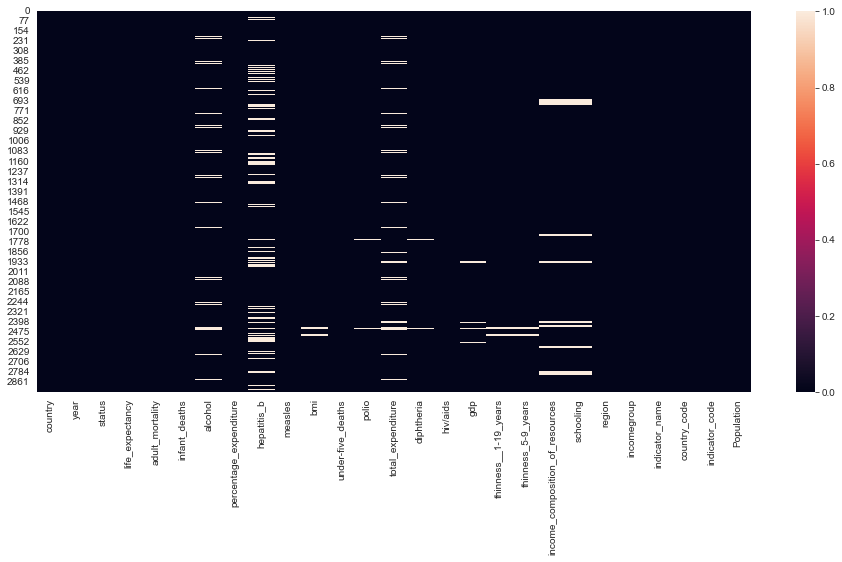

In [135]:
plt.figure(figsize = (16,7))
sns.heatmap(pd.isnull(df2))

In [136]:
def UVA_numeric(data):
    data = data.dropna()
    var_group = data.columns
    size = len(var_group)
    plt.figure(figsize = (size*8,size *3), dpi = 100)

    #looping for each variable
    for j,i in enumerate(var_group):
        

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

        #Plotting the variable with every information
        plt.subplot(size,1,j+1)
        sns.distplot(data[i],hist=True, kde=True)
        
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                       round(kurt,2),
                                                                                                       round(skew,2),
                                                                                                       (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                       round(mean,2),
                                                                                                       round(median,2)))
        plt.tight_layout()


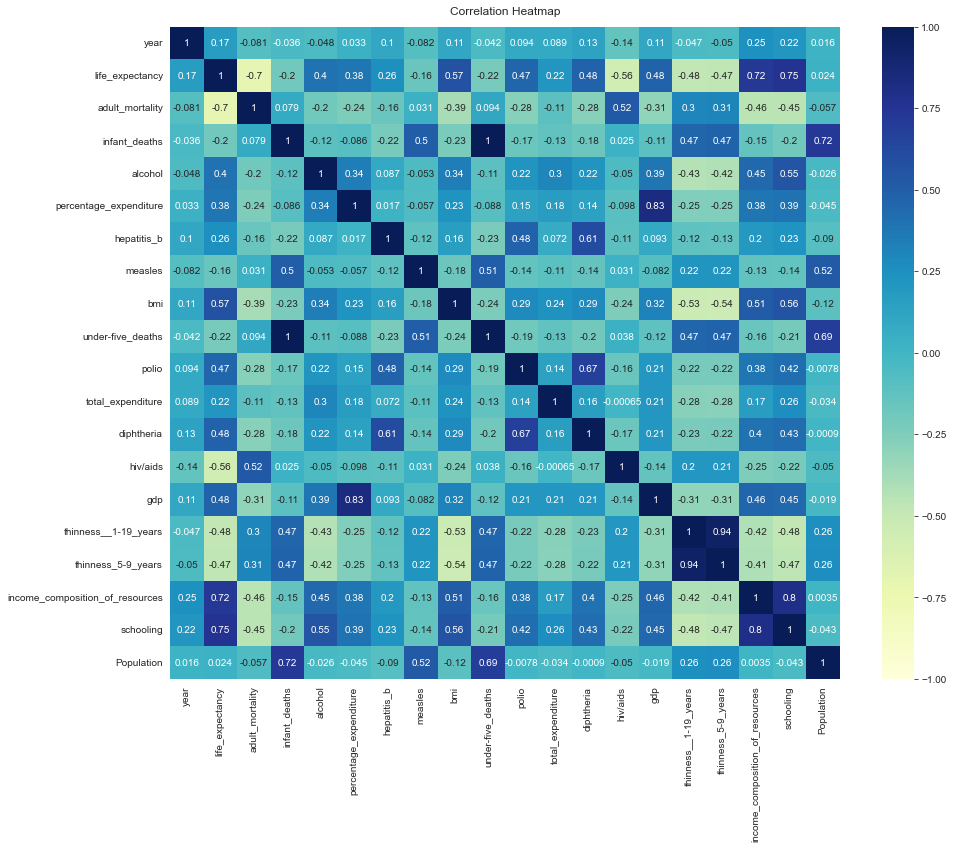

In [137]:
plt.figure(figsize= (15, 12))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1,cmap="YlGnBu", annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

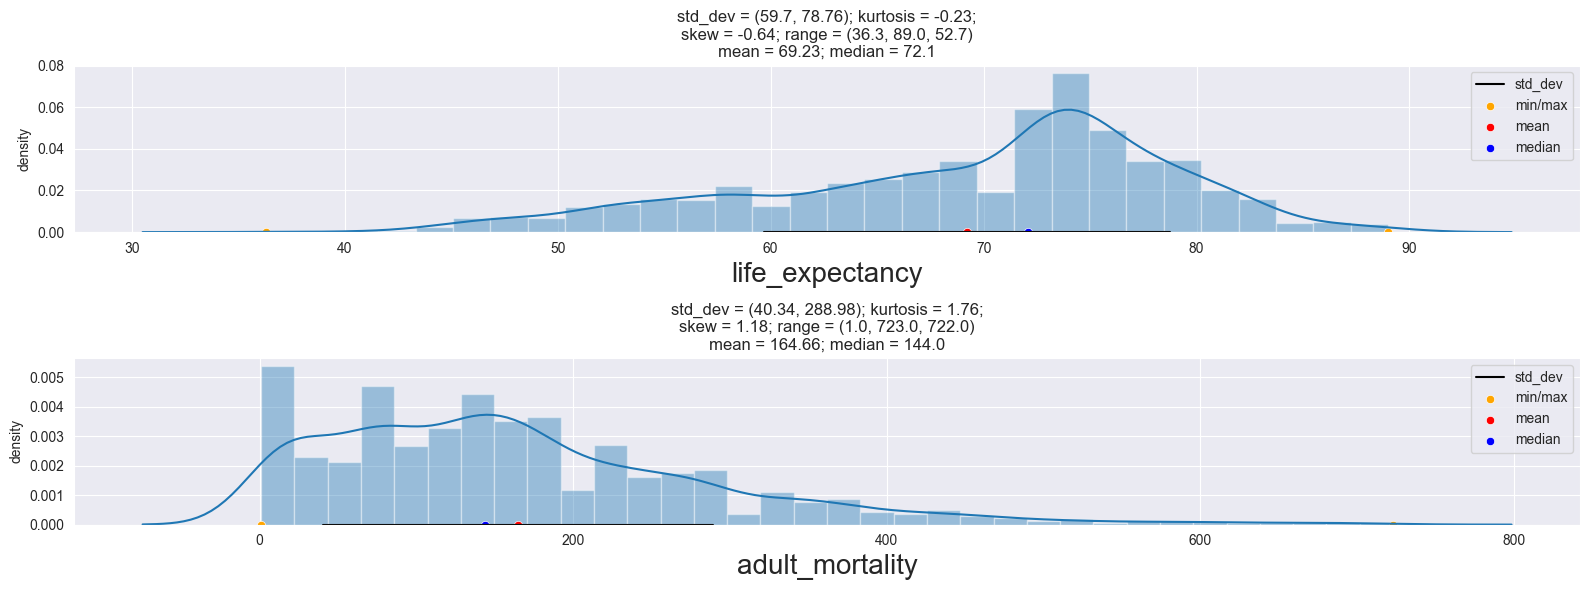

In [138]:
UVA_numeric(df2[['life_expectancy', 'adult_mortality']])

In [139]:
df2.corr()['life_expectancy'].sort_values(ascending=False)

life_expectancy                    1.000000
schooling                          0.752857
income_composition_of_resources    0.724663
bmi                                0.567449
diphtheria                         0.480047
gdp                                0.475305
polio                              0.466099
alcohol                            0.404554
percentage_expenditure             0.381704
hepatitis_b                        0.257539
total_expenditure                  0.217589
year                               0.171201
Population                         0.023789
measles                           -0.157765
infant_deaths                     -0.196754
under-five_deaths                 -0.222735
thinness_5-9_years                -0.471291
thinness__1-19_years              -0.476880
hiv/aids                          -0.556869
adult_mortality                   -0.696217
Name: life_expectancy, dtype: float64

In [140]:
cat_features = df2.select_dtypes(include = [np.object])
num_features = df2.select_dtypes(include = [np.number])
cat_cols = cat_features.columns
num_cols = num_features.columns

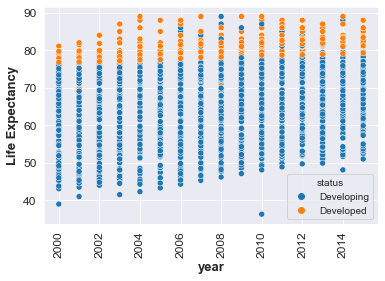

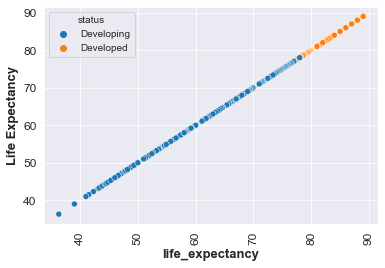

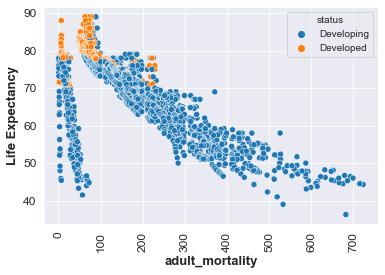

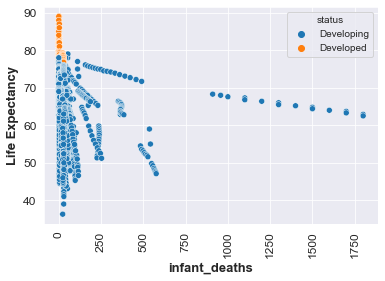

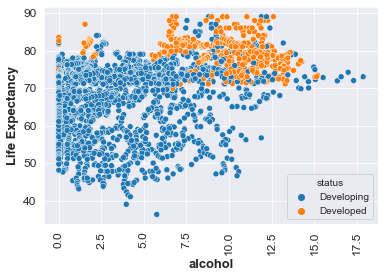

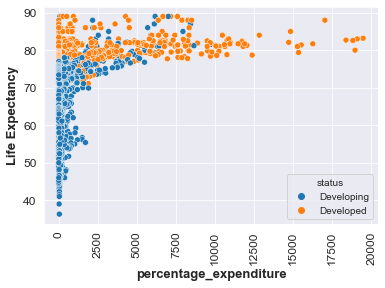

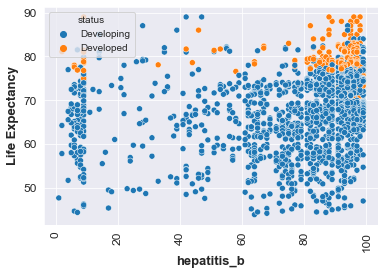

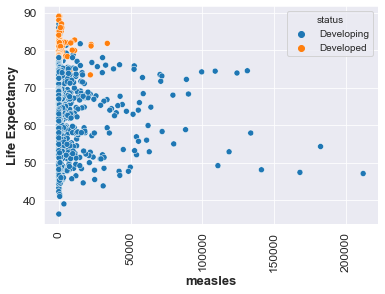

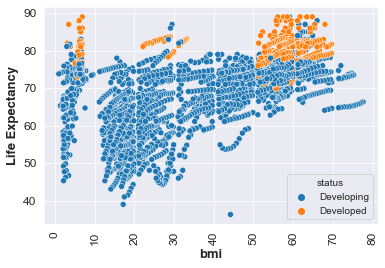

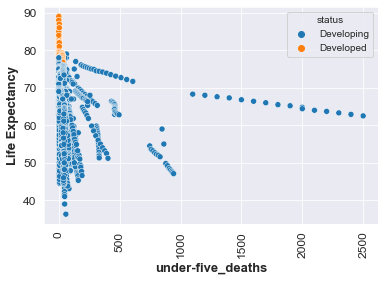

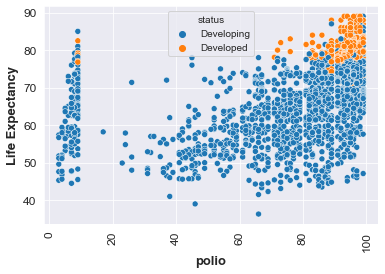

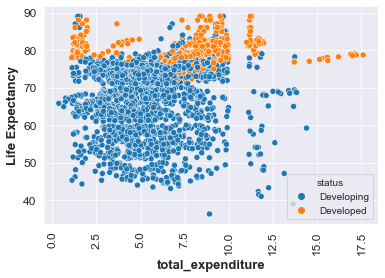

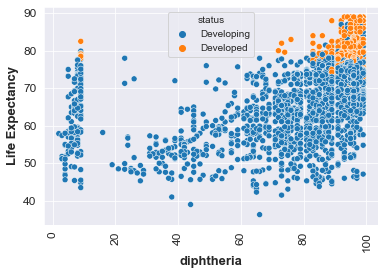

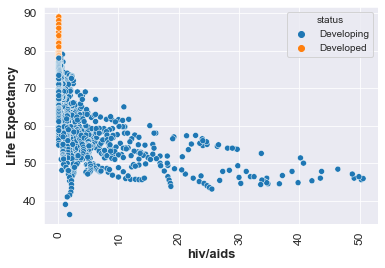

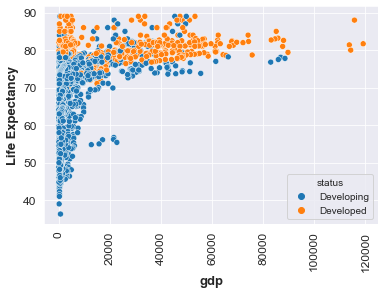

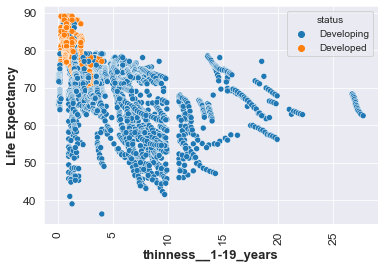

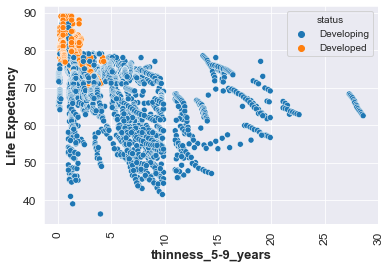

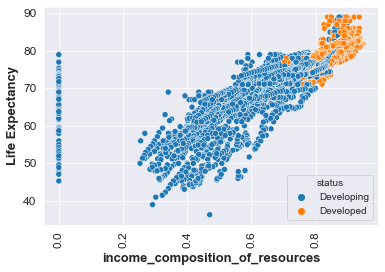

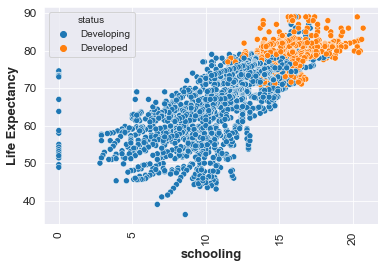

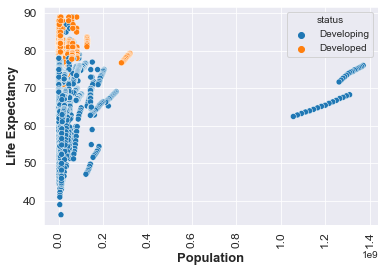

In [141]:
for col in num_cols:
    sns.scatterplot(x= df2[col], y= df2.life_expectancy, hue= df2.status)
    plt.xticks(rotation=90, fontsize= 12)
    plt.yticks(fontsize=12)
    plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold", name= "helvetica")
    plt.xlabel(col, fontsize=13, fontweight="bold")
    plt.show()

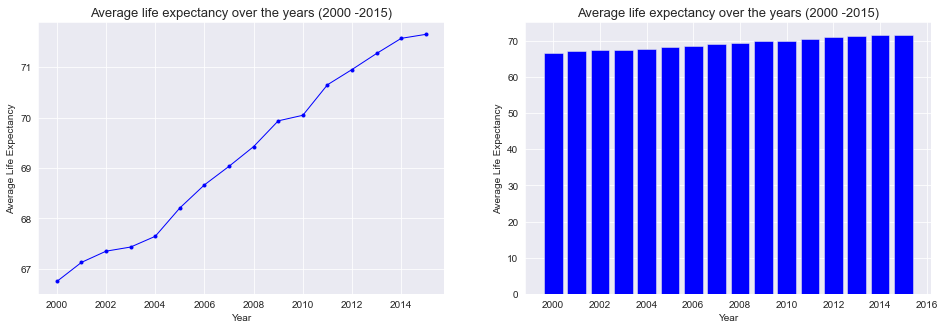

In [142]:
plot_1 = df2[['year', 'life_expectancy']].groupby('year').mean()
fig, axes = plt.subplots(1,2,figsize= (16,5))
plt.style.use('ggplot')

axes[0].plot(plot_1, lw = 1, marker = '.', color = 'b')
axes[0].set_xlabel('Year', fontsize = 10)
axes[0].set_ylabel('Average Life Expectancy', fontsize = 10)
axes[0].set_title('Average life expectancy over the years (2000 -2015)', loc = 'center', fontsize = 13)

axes[1].bar(df2.groupby('year')['year'].count().index,df2.groupby('year')['life_expectancy'].mean(), color = 'b')
axes[1].set_title('Average life expectancy over the years (2000 -2015)', loc = 'center', fontsize = 13)
axes[1].set_xlabel('Year', fontsize = 10)
axes[1].set_ylabel('Average Life Expectancy', fontsize = 10)
plt.show()

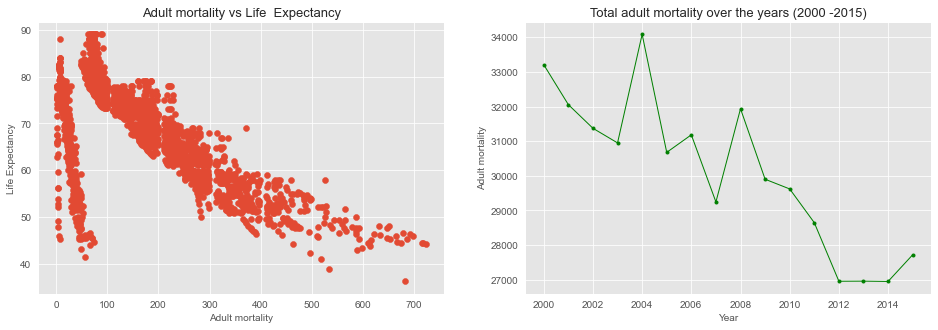

In [143]:
plot_2 = df2[['year', 'adult_mortality']].groupby('year').sum()
fig, axes = plt.subplots(1,2,figsize= (16,5))
plt.style.use('ggplot')

axes[0].scatter( df2['adult_mortality'], df2['life_expectancy'])
axes[0].set_xlabel('Adult mortality', fontsize = 10)
axes[0].set_ylabel('Life Expectancy', fontsize = 10)
axes[0].set_title('Adult mortality vs Life  Expectancy', loc = 'center', fontsize = 13)

axes[1].plot(plot_2, lw = 1, marker = '.', color = 'g')
axes[1].set_xlabel('Year', fontsize = 10)
axes[1].set_ylabel('Adult mortality', fontsize = 10)
axes[1].set_title('Total adult mortality over the years (2000 -2015)', loc = 'center', fontsize = 13)

plt.show()

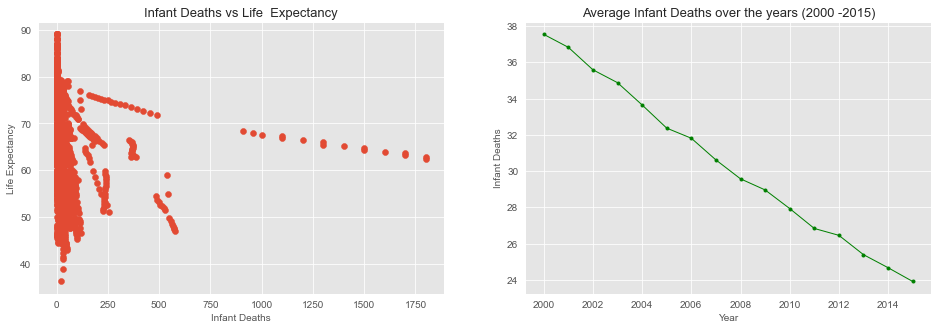

In [144]:
plot_3 = df2[['year', 'infant_deaths']].groupby('year').mean()
fig, axes = plt.subplots(1,2,figsize= (16,5))
plt.style.use('ggplot')

axes[0].scatter( df2['infant_deaths'], df2['life_expectancy'])
axes[0].set_xlabel('Infant Deaths', fontsize = 10)
axes[0].set_ylabel('Life Expectancy', fontsize = 10)
axes[0].set_title('Infant Deaths vs Life  Expectancy', loc = 'center', fontsize = 13)

axes[1].plot(plot_3, lw = 1, marker = '.', color = 'g')
axes[1].set_xlabel('Year', fontsize = 10)
axes[1].set_ylabel('Infant Deaths', fontsize = 10)
axes[1].set_title('Average Infant Deaths over the years (2000 -2015)', loc = 'center', fontsize = 13)

plt.show()

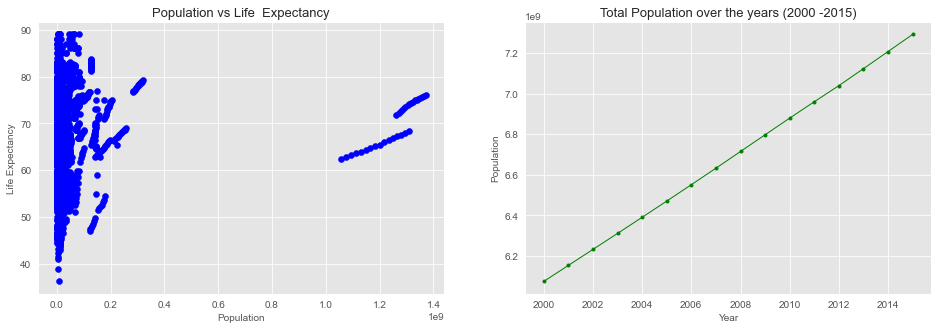

In [145]:
plot_4 = df2[['year', 'Population']].groupby('year').sum()
fig, axes = plt.subplots(1,2,figsize= (16,5))
plt.style.use('ggplot')

axes[0].scatter( df2['Population'],df2['life_expectancy'], color = 'b')
axes[0].set_xlabel('Population', fontsize = 10)
axes[0].set_ylabel('Life Expectancy', fontsize = 10)
axes[0].set_title('Population vs Life  Expectancy', loc = 'center', fontsize = 13)

axes[1].plot(plot_4, lw = 1, marker = '.', color = 'g')
axes[1].set_xlabel('Year', fontsize = 10)
axes[1].set_ylabel('Population', fontsize = 10)
axes[1].set_title('Total Population over the years (2000 -2015)', loc = 'center', fontsize = 13)

plt.show()

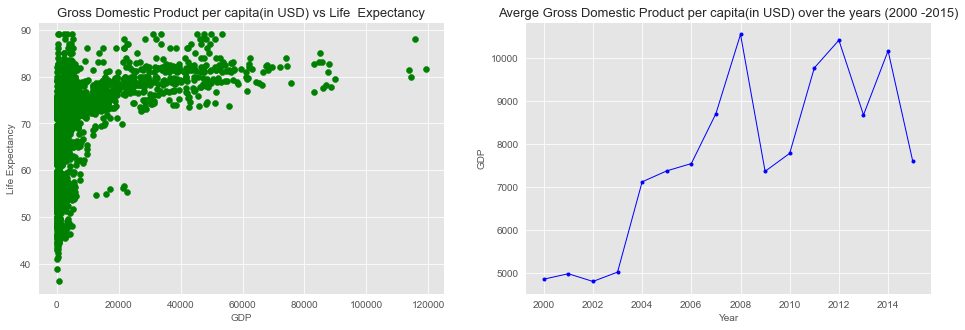

In [146]:
plot_5 = df2[['year', 'gdp']].groupby('year').mean()
fig, axes = plt.subplots(1,2,figsize= (16,5))
plt.style.use('ggplot')

axes[0].scatter(df2['gdp'], df2['life_expectancy'], color = 'g')
axes[0].set_xlabel('GDP', fontsize = 10)
axes[0].set_ylabel('Life Expectancy', fontsize = 10)
axes[0].set_title('Gross Domestic Product per capita(in USD) vs Life  Expectancy', loc = 'center', fontsize = 13)

axes[1].plot(plot_5, lw = 1, marker = '.', color = 'b')
axes[1].set_xlabel('Year', fontsize = 10)
axes[1].set_ylabel('GDP', fontsize = 10)
axes[1].set_title('Averge Gross Domestic Product per capita(in USD) over the years (2000 -2015)', loc = 'center', fontsize = 13)

plt.show()

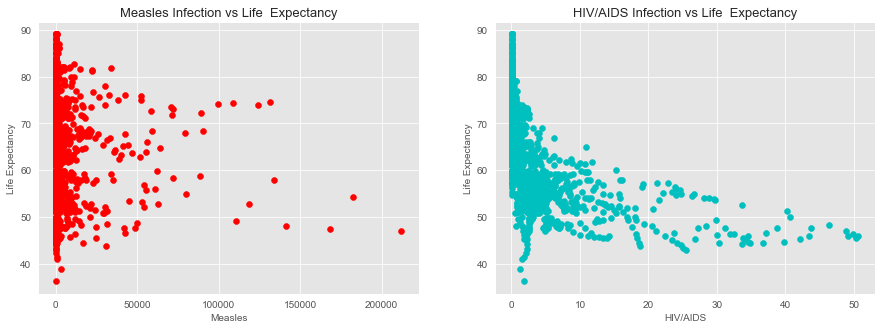

In [147]:
fig, axes = plt.subplots(1,2,figsize= (15, 5))
plt.style.use('ggplot')

axes[0].scatter( df2['measles'], df2['life_expectancy'], color = 'r')
axes[0].set_xlabel('Measles', fontsize = 10)
axes[0].set_ylabel('Life Expectancy', fontsize = 10)
axes[0].set_title('Measles Infection vs Life  Expectancy', loc = 'center', fontsize = 13)

axes[1].scatter( df2['hiv/aids'],df2['life_expectancy'], color = 'c')
axes[1].set_xlabel('HIV/AIDS', fontsize = 10)
axes[1].set_ylabel('Life Expectancy', fontsize = 10)
axes[1].set_title('HIV/AIDS Infection vs Life  Expectancy', loc = 'center', fontsize = 13)

plt.show()

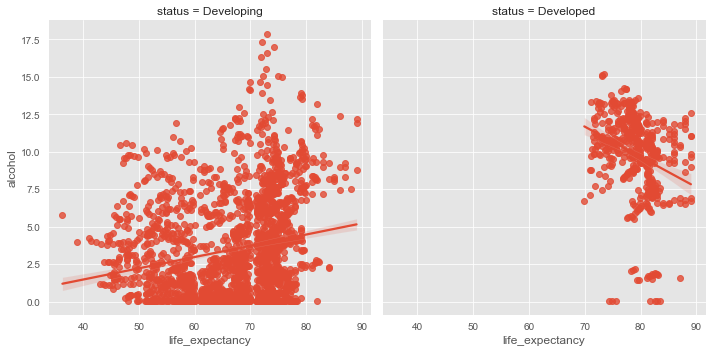

In [148]:
sns.lmplot(x='life_expectancy',y='alcohol',data=df2,col='status',palette='coolwarm')

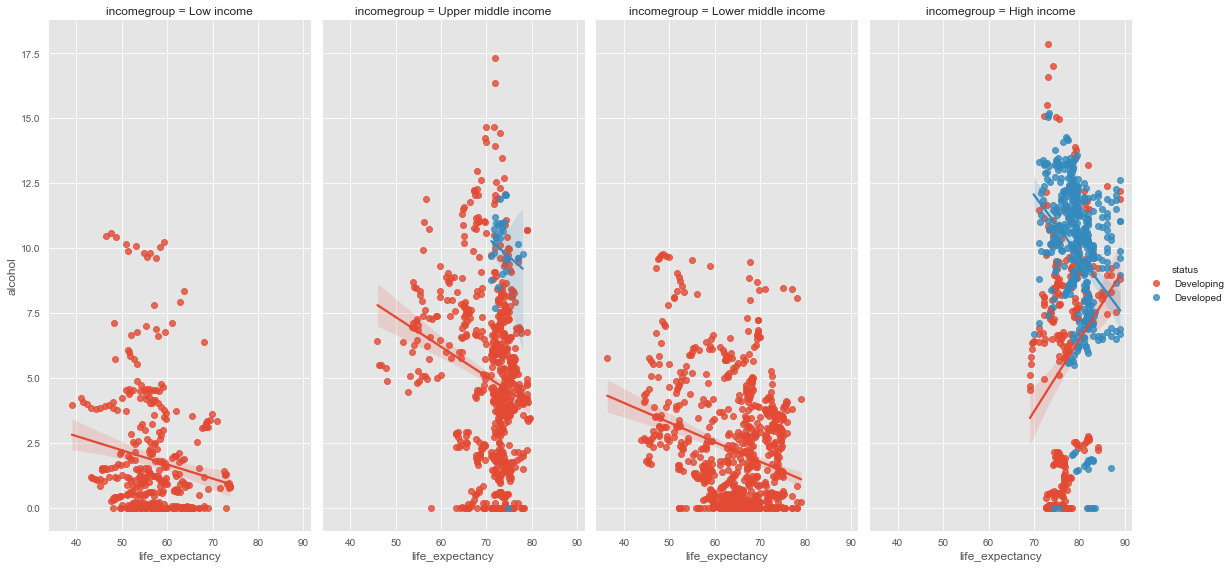

In [149]:
sns.lmplot(x='life_expectancy',y='alcohol',data=df2,col='incomegroup',hue='status',
          aspect=0.5,size=8)

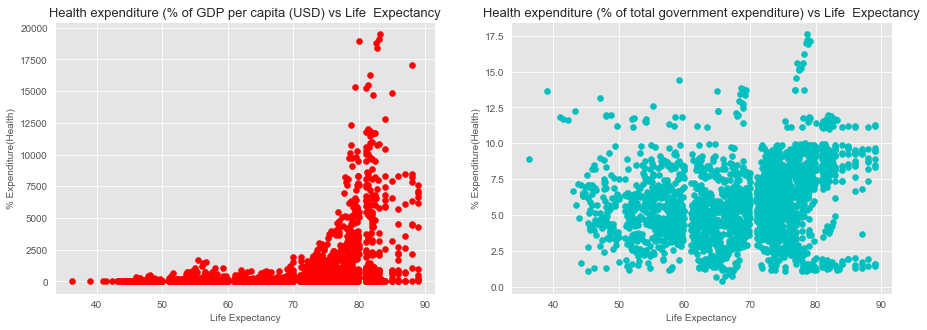

In [150]:
fig, axes = plt.subplots(1,2,figsize= (15, 5))
plt.style.use('ggplot')

axes[0].scatter( df2['life_expectancy'],df2['percentage_expenditure'], color = 'r')
axes[0].set_xlabel('Life Expectancy', fontsize = 10)
axes[0].set_ylabel('% Expenditure(Health)', fontsize = 10)
axes[0].set_title('Health expenditure (% of GDP per capita (USD) vs Life  Expectancy', loc = 'center', fontsize = 13)

axes[1].scatter( df2['life_expectancy'],df2['total_expenditure'], color = 'c')
axes[1].set_xlabel('Life Expectancy', fontsize = 10)
axes[1].set_ylabel('% Expenditure(Health)', fontsize = 10)
axes[1].set_title('Health expenditure (% of total government expenditure) vs Life  Expectancy', loc = 'center', fontsize = 13)

plt.show()

In [151]:
df2.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'region', 'incomegroup', 'indicator_name', 'country_code',
       'indicator_code', 'Population'],
      dtype='object')

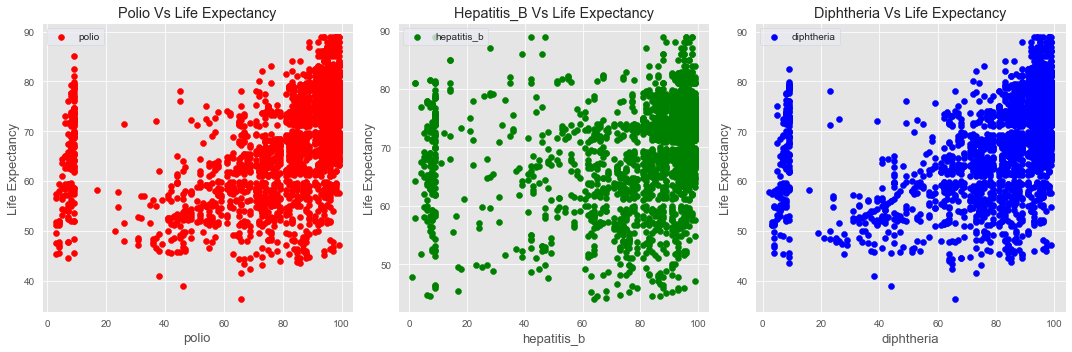

In [152]:
plot_6 = df2[['polio', 'hepatitis_b','diphtheria', 'life_expectancy']]
fig, axes = plt.subplots(1,3,figsize = (15,5))
sns.set_style(style = 'darkgrid')
for data, subplot, color in zip(['polio', 'hepatitis_b','diphtheria'], axes, ['r','g', 'b']):
    subplot.scatter(plot_6[data],plot_6['life_expectancy'], color = color, label = data)
    subplot.set_title(f'{data.title()} Vs Life Expectancy')
    subplot.set_ylabel('Life Expectancy', fontsize = 13)
    subplot.set_xlabel(data, fontsize = 13)
    subplot.legend()
plt.tight_layout()

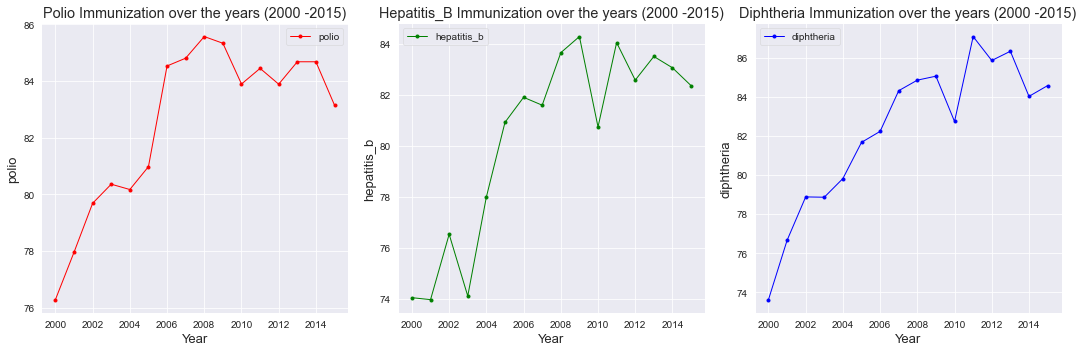

In [153]:
plot_7 = df2[['polio', 'hepatitis_b','diphtheria', 'year']].groupby('year').mean()
fig, axes = plt.subplots(1,3,figsize = (15,5))
sns.set_style(style = 'darkgrid')
for data, subplot, color in zip(plot_7.columns, axes, ['r','g', 'b']):
    subplot.plot(plot_7[data], color = color,  lw = 1, marker = '.', label = data)
    subplot.set_title(f'{data.title()} Immunization over the years (2000 -2015)')
    subplot.set_ylabel(data, fontsize = 13)
    subplot.set_xlabel('Year', fontsize = 13)
    subplot.legend()
plt.tight_layout()

In [154]:
df2.region.value_counts()

Europe & Central Asia         768
Sub-Saharan Africa            764
Latin America & Caribbean     496
East Asia & Pacific           416
Middle East & North Africa    320
South Asia                    128
North America                  32
Name: region, dtype: int64

In [155]:
df2[df2.region == 'Middle East & North Africa']['country'].unique()

array(['Algeria', 'Bahrain', 'Djibouti', 'Egypt', 'Iran', 'Iraq',
       'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Malta',
       'Morocco', 'Oman', 'Qatar', 'Saudi Arabia', 'Syrian Arab Republic',
       'Tunisia', 'United Arab Emirates', 'Yemen'], dtype=object)

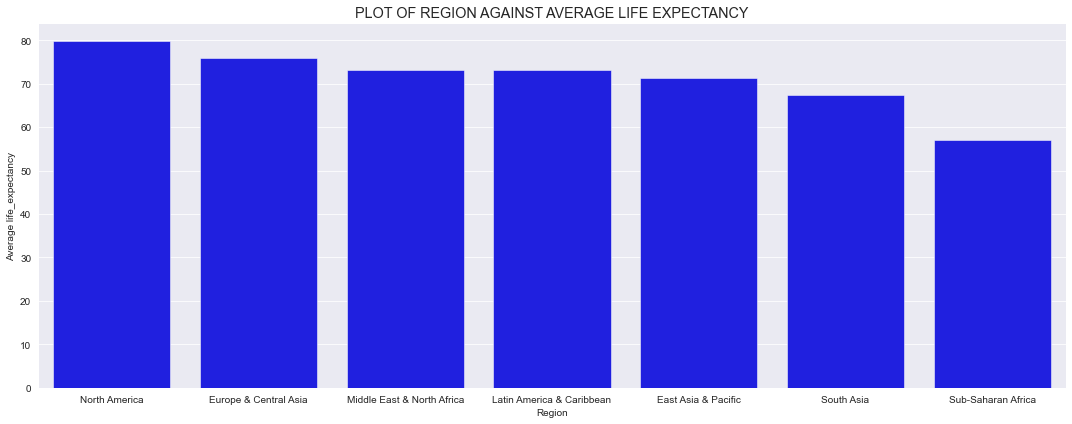

In [156]:
ax = df2[['region', 'life_expectancy']].groupby('region').mean().sort_values(by= 'life_expectancy',ascending= False)
plt.figure(figsize = (15,6))
sns.barplot(ax.index, ax['life_expectancy'], color = 'blue')
plt.xlabel('Region', fontsize = 10)
plt.ylabel('Average life_expectancy', fontsize = 10)
plt.title('PLOT OF REGION AGAINST AVERAGE LIFE EXPECTANCY')
plt.tight_layout()

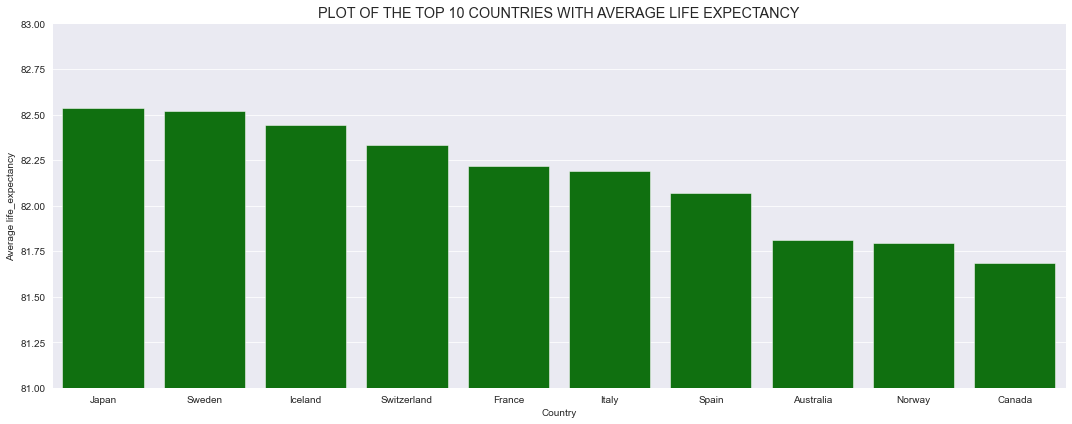

In [157]:
ax = df2[['country', 'life_expectancy']].groupby('country').mean().sort_values(by= 'life_expectancy',ascending= False).head(10)
plt.figure(figsize = (15,6))
sns.barplot(ax.index, ax['life_expectancy'], color = 'green')
plt.ylim(81, 83)
plt.xlabel('Country', fontsize = 10)
plt.ylabel('Average life_expectancy', fontsize = 10)
plt.title('PLOT OF THE TOP 10 COUNTRIES WITH AVERAGE LIFE EXPECTANCY')
plt.tight_layout()

                          life_expectancy
country                                  
Sierra Leone                     46.11250
Central African Republic         48.51250
Lesotho                          48.78125
Angola                           49.01875
Malawi                           49.89375
Chad                             50.38750
Côte d'Ivoire                    50.38750
Zimbabwe                         50.48750
Eswatini                         51.32500
Nigeria                          51.35625


Text(0.5, 1.0, 'PLOT OF THE LEAST 10 COUNTRIES WITH AVERAGE LIFE EXPECTANCY')

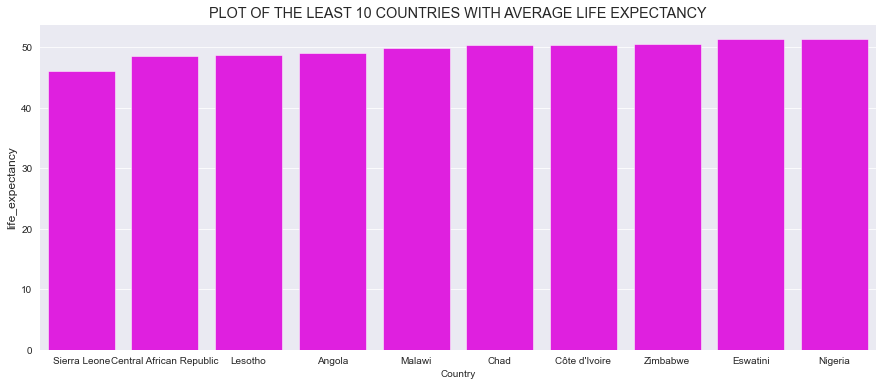

In [158]:
ax2 = df2[['country', 'life_expectancy']].groupby('country').mean().sort_values(by= 'life_expectancy',ascending= True).head(10)
plt.figure(figsize = (15,6))
print(ax2)
sns.barplot(ax2.index, ax2['life_expectancy'], color = 'magenta')
plt.xlabel('Country', fontsize = 10)
plt.title('PLOT OF THE LEAST 10 COUNTRIES WITH AVERAGE LIFE EXPECTANCY')

In [159]:
least_countries = ax2.index
least_ten_df =  df2[df2['country'].isin(least_countries)]

In [160]:
least_ten_df.region.value_counts()

Sub-Saharan Africa    160
Name: region, dtype: int64

In [161]:
df2[['infant_deaths', 'adult_mortality','total_expenditure']].describe()

,infant_deaths,adult_mortality,total_expenditure
count,2924.000000,2924.000000,2699.000000
mean,30.441518,164.660739,5.933264
std,118.191641,124.322602,2.482904
min,0.000000,1.000000,0.370000
25%,0.000000,74.000000,4.260000
50%,3.000000,144.000000,5.760000
75%,22.000000,227.000000,7.495000
max,1800.000000,723.000000,17.600000


<AxesSubplot:title={'center':'Least ten countries % government expenditure on Health vs Life expectancy'}, xlabel='life_expectancy', ylabel='total_expenditure'>

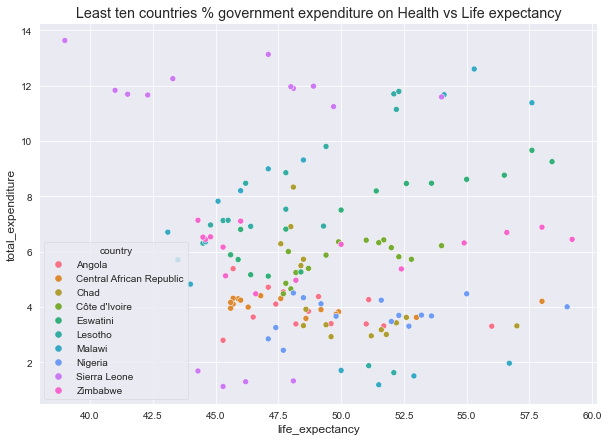

In [162]:
plt.figure(figsize= (10,7))
plt.title('Least ten countries % government expenditure on Health vs Life expectancy')
sns.scatterplot(x='life_expectancy', y ='total_expenditure', data = least_ten_df,hue = 'country',color = 'g')

<AxesSubplot:xlabel='life_expectancy', ylabel='adult_mortality'>

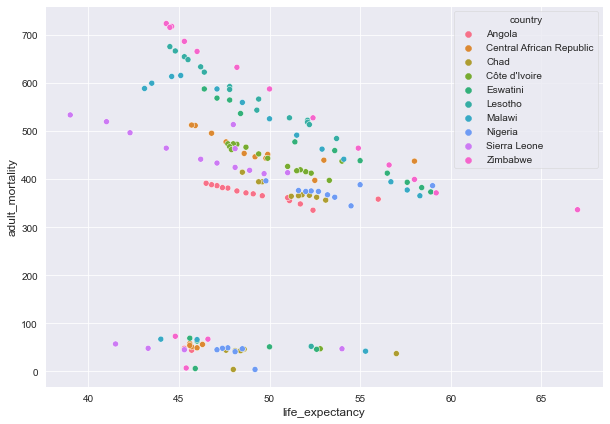

In [163]:
plt.figure(figsize= (10,7))
sns.scatterplot(x='life_expectancy', y ='adult_mortality', data = least_ten_df,hue = 'country',color = 'g')

<AxesSubplot:xlabel='life_expectancy', ylabel='infant_deaths'>

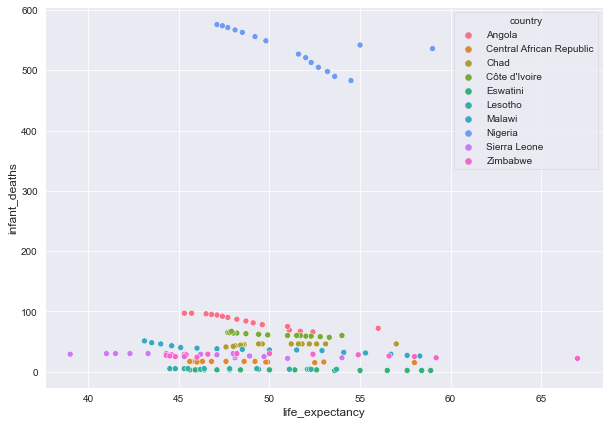

In [164]:
plt.figure(figsize= (10,7))
sns.scatterplot(x='life_expectancy', y ='infant_deaths', data = least_ten_df,hue = 'country',color = 'g')

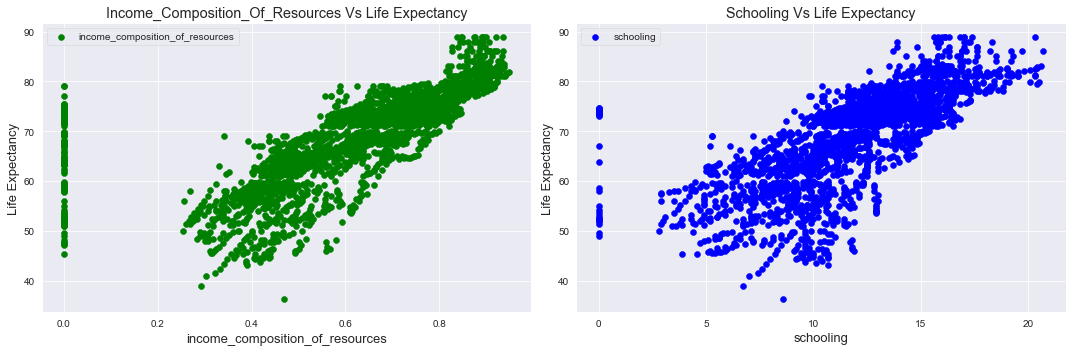

In [165]:
plot_8 = df2[['income_composition_of_resources', 'schooling', 'life_expectancy']]
fig, axes = plt.subplots(1,2,figsize = (15,5))
sns.set_style(style = 'darkgrid')
for data, subplot, color in zip(['income_composition_of_resources', 'schooling'], axes, ['g', 'b']):
    subplot.scatter(plot_8[data],plot_8['life_expectancy'], color = color, label = data)
    subplot.set_title(f'{data.title()} Vs Life Expectancy')
    subplot.set_ylabel('Life Expectancy', fontsize = 13)
    subplot.set_xlabel(data, fontsize = 13)
    subplot.legend()
plt.tight_layout()

                     life_expectancy
incomegroup                         
Low income                 57.000234
Lower middle income        64.524884
Upper middle income        71.436275
High income                78.426838


Text(0.5, 1.0, 'PLOT OF INCOME GROUP AGAINST AVERAGE LIFE EXPECTANCY')

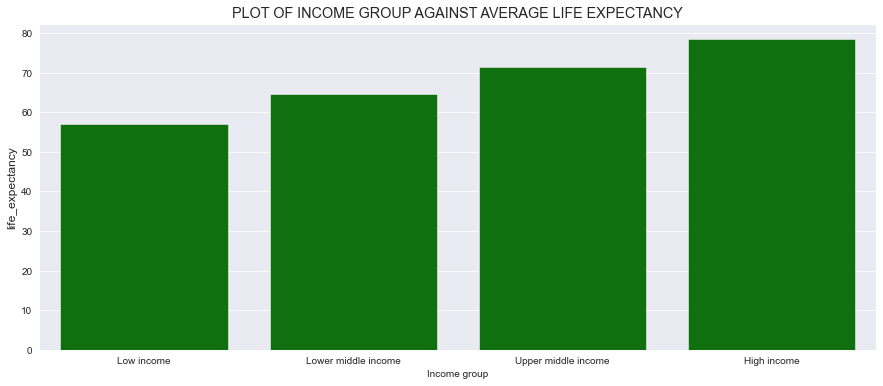

In [166]:
ax3 = df2[['incomegroup', 'life_expectancy']].groupby('incomegroup').mean().sort_values(by= 'life_expectancy',ascending= True)
plt.figure(figsize = (15,6))
print(ax3)
sns.barplot(ax3.index, ax3['life_expectancy'], color = 'green')
plt.xlabel('Income group', fontsize = 10)
plt.title('PLOT OF INCOME GROUP AGAINST AVERAGE LIFE EXPECTANCY')

In [167]:
df3 =  df2[['country', 'adult_mortality',  'year']]
idx_max= df3.groupby(['country'])['adult_mortality'].transform(max) == df3['adult_mortality']
df3[idx_max].sort_values('adult_mortality', ascending =False)

,country,adult_mortality,year
2931,Zimbabwe,723.0,2004
349,Botswana,699.0,2002
1126,Haiti,682.0,2010
1483,Lesotho,675.0,2005
1580,Malawi,615.0,2004
...,...,...,...
1328,Japan,74.0,2000
1184,Iceland,74.0,2000
2533,Sweden,73.0,2001
2534,Sweden,73.0,2000


In [168]:
df3 =  df2[['country', 'infant_deaths',  'year', 'Population']]
idx_max= df3.groupby(['country'])['infant_deaths'].transform(max) == df3['infant_deaths']
df3[idx_max].sort_values('infant_deaths', ascending =False)

,country,infant_deaths,year,Population
1200,India,1800,2000,1.056576e+09
1199,India,1800,2001,1.075000e+09
1923,Nigeria,576,2000,1.222839e+08
559,China,490,2000,1.262645e+09
2003,Pakistan,385,2000,1.423436e+08
...,...,...,...,...
137,Austria,0,2006,8.268641e+06
1450,Latvia,0,2006,2.218357e+06
1451,Latvia,0,2005,2.238799e+06
1452,Latvia,0,2004,2.263122e+06


In [169]:
df3 =  df2[['country', 'infant_deaths',  'year', 'Population']]
idx_max= df3.groupby(['country'])['infant_deaths'].transform(min) == df3['infant_deaths']
df3[idx_max].sort_values('infant_deaths', ascending =False)

,country,infant_deaths,year,Population
1185,India,910,2015,1.310152e+09
1908,Nigeria,483,2015,1.811375e+08
1988,Pakistan,352,2015,1.994270e+08
719,Democratic Republic of the Congo,226,2000,4.710583e+07
544,China,157,2015,1.371220e+09
...,...,...,...,...
1381,Kiribati,0,2011,1.047350e+05
1382,Kiribati,0,2010,1.029300e+05
1383,Kiribati,0,2009,1.009280e+05
1384,Kiribati,0,2008,9.876000e+04


### Outlier Detection

In [170]:
def find_outlier_IQR(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    IQR = q3-q1
    lower = q1 - 1.5*IQR
    upper =  q1 + 1.5*IQR
    outlier_indices = list(x.index[(x < lower) | (x > upper)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values
    

In [171]:
for num in num_features.columns:
    indices, values = find_outlier_IQR(df2[num])
    print(f'{num} Outlier: ')
    print(np.sort(values))

year Outlier: 
[]
life_expectancy Outlier: 
[36.3 39.  41.  41.5 42.3 43.1 43.3 43.5 43.8 44.  82.1 82.1 82.1 82.1
 82.1 82.2 82.2 82.2 82.2 82.3 82.3 82.3 82.3 82.3 82.4 82.4 82.4 82.4
 82.4 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.6 82.6 82.6 82.7 82.7 82.7
 82.7 82.7 82.7 82.8 82.8 82.9 83.  83.  83.  83.  83.  83.  83.  83.
 83.  83.  83.  83.  83.  83.  83.  83.  83.1 83.2 83.3 83.4 83.5 83.5
 83.7 84.  84.  84.  84.  84.  84.  84.  84.  84.  84.  84.  85.  85.
 85.  85.  85.  85.  85.  85.  85.  85.  85.  85.  86.  86.  86.  86.
 86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  86.  87.  87.  87.
 87.  87.  87.  87.  87.  87.  88.  88.  88.  88.  88.  88.  88.  88.
 88.  88.  89.  89.  89.  89.  89.  89.  89.  89.  89.  89.  89. ]
adult_mortality Outlier: 
[311. 312. 312. 312. 313. 313. 314. 314. 314. 314. 315. 316. 316. 317.
 317. 317. 318. 318. 321. 321. 321. 321. 321. 322. 322. 322. 322. 323.
 323. 323. 323. 323. 325. 325. 325. 325. 326. 327. 327. 327. 327. 328.
 328. 328. 328. 

In [172]:
df2.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            192
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 32
under-five_deaths                    0
polio                               19
total_expenditure                  225
diphtheria                          19
hiv/aids                             0
gdp                                 47
thinness__1-19_years                32
thinness_5-9_years                  32
income_composition_of_resources    160
schooling                          160
region                               0
incomegroup                          0
indicator_name                       0
country_code                         0
indicator_code           

### Missing value Imputation

In [173]:
df2 = df2[df2['life_expectancy'].notnull()]

In [174]:
Features_to_be_removed = ['indicator_name', 'country_code', 'indicator_code']

In [175]:
new_df= df2.copy()
new_df.drop(Features_to_be_removed, axis =1, inplace = True)

In [176]:
y = new_df['life_expectancy'].values
X = new_df.drop('life_expectancy', axis=1)

In [177]:
cat_features = X.select_dtypes(include = [np.object])
num_features = X.select_dtypes(include = [np.number])
cat_cols = cat_features.columns
num_cols = num_features.columns

In [178]:
cat_cols

Index(['country', 'status', 'region', 'incomegroup'], dtype='object')

In [179]:
num_cols

Index(['year', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling', 'Population'],
      dtype='object')

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Mean, Median Imputation

In [181]:
from sklearn.pipeline import Pipeline
strategies = ['mean', 'median']
for s in strategies:
    t = [('cat', OneHotEncoder(), cat_cols), ('imp', SimpleImputer(strategy=s), num_cols)]
    col_transform = ColumnTransformer(transformers=t)
    model = LinearRegression()
    pipeline = Pipeline(steps=[('prep',col_transform), ('m',model)])
    # evaluate the model
    cv = KFold(n_splits=10, shuffle = True, random_state=4)
    scores = cross_val_score(pipeline, X, y, scoring='r2', cv=cv, n_jobs=-1)
    # store results
    msg = "%s: %f (%f)" % (s, scores.mean(), scores.std())
    print(msg)

mean: 0.712990 (0.032285)
median: 0.711666 (0.032597)


In [182]:
from sklearn.pipeline import Pipeline
strategies = ['mean', 'median']
for s in strategies:
    t = [('cat', OneHotEncoder(), cat_cols), ('imp', SimpleImputer(strategy=s), num_cols)]
    col_transform = ColumnTransformer(transformers=t)
    model = RandomForestRegressor(random_state = 42)
    pipeline = Pipeline(steps=[('prep',col_transform), ('m',model)])
    # evaluate the model
    cv = KFold(n_splits=10, shuffle = True, random_state=4)
    scores = cross_val_score(pipeline, X, y, scoring='r2', cv=cv, n_jobs=-1)
    # store results
    msg = "%s: %f (%f)" % (s, scores.mean(), scores.std())
    print(msg)

mean: 0.967110 (0.007855)
median: 0.966817 (0.007942)


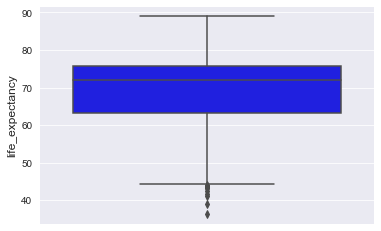

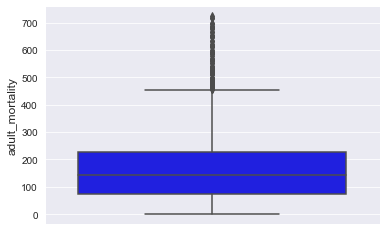

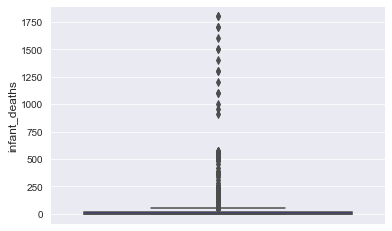

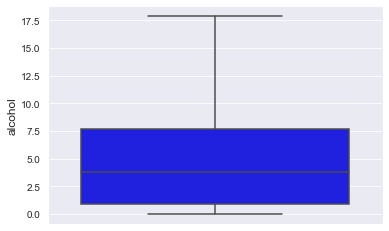

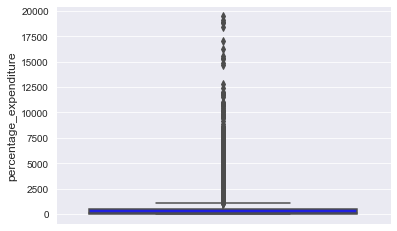

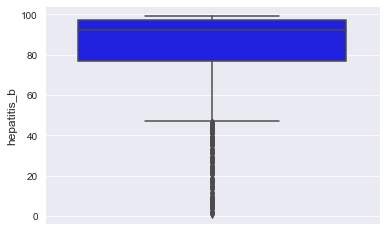

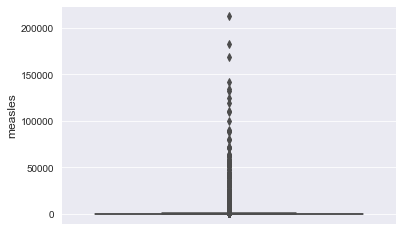

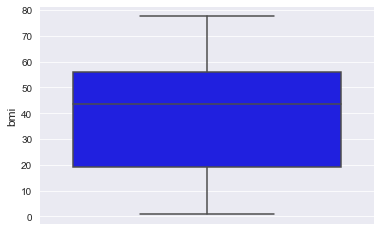

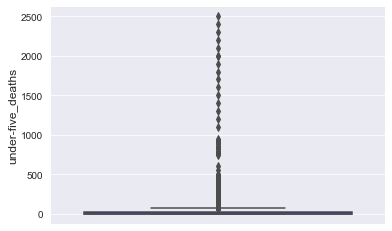

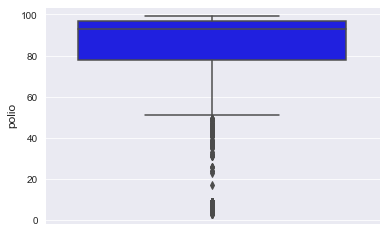

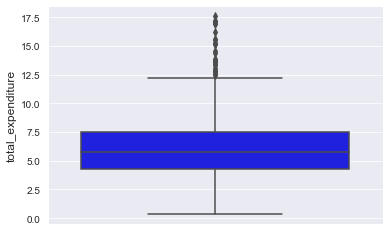

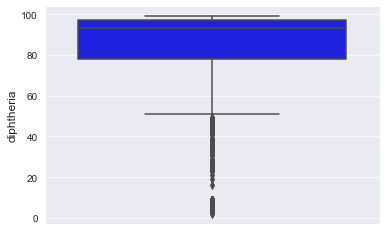

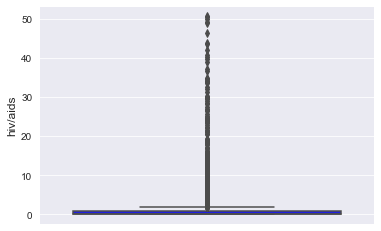

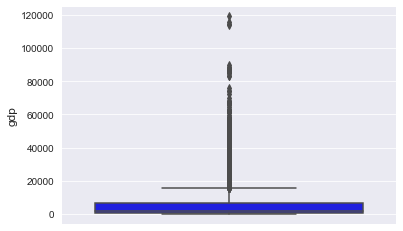

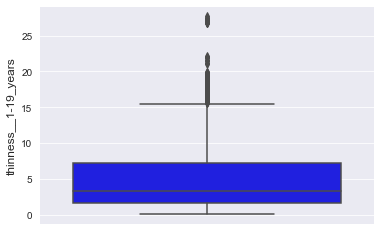

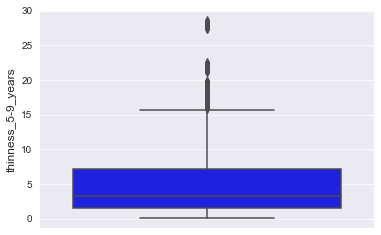

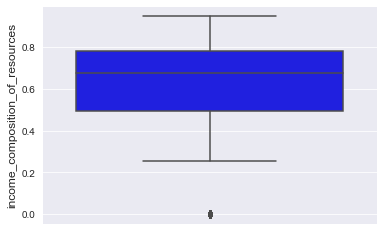

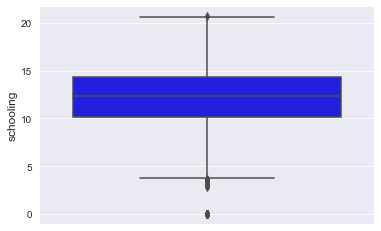

In [183]:
df_dropped = df2.drop(columns=["country", "year"])
numeric_features=[x for x in df_dropped.columns if df_dropped[x].dtype!="object"]
for i in range(len(numeric_features)-1):
    sns.boxplot(y = df_dropped[numeric_features[i]], color="blue")
    plt.show()

In [184]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# imputing null value with mean
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
   
])
#Encoding category variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('cat', categorical_transformer, cat_cols),
        ('num', numerical_transformer, num_cols)
    ]
)

In [185]:
from lightgbm import LGBMRegressor

In [186]:
from collections import OrderedDict
models = OrderedDict([
    ( "Linear Regression",       Pipeline([
                                            ('preprocessor', preprocessor),
                                            ('LRegressor', LinearRegression())])  ),
    ( "Decision Tree Regressor", Pipeline([
                                           ('preprocessor', preprocessor),
                                            ('DTRegressor', DecisionTreeRegressor())])  ),
    ( "Random Forest Regressor", Pipeline([
                                           ('preprocessor', preprocessor),
                                            ('RFRegressor', RandomForestRegressor())])  ),
    ( "Catboost Regressor", Pipeline([
                                           ('preprocessor', preprocessor),
                                            ('CatBoostRegressor', CatBoostRegressor())])  ),
    ( "Xgboost Regressor", Pipeline([
                                           ('preprocessor', preprocessor),
                                            ('XGBoostRegressor', XGBRegressor())])  ),
        ( "Lightgbm Regressor", Pipeline([
                                           ('preprocessor', preprocessor),
                                            ('LightgbmRegressor', LGBMRegressor())])  )
    
])

In [187]:
scores = {}
for (name, model) in models.items():
    model.fit(X_train,y_train)
    scores[name] =r2_score(model.predict(X_test), y_test)
    
scores = OrderedDict(sorted(scores.items()))


Learning rate set to 0.046826
0:	learn: 9.1919247	total: 2.25s	remaining: 37m 28s
1:	learn: 8.8600510	total: 2.28s	remaining: 18m 58s
2:	learn: 8.5499877	total: 2.3s	remaining: 12m 44s
3:	learn: 8.2603493	total: 2.32s	remaining: 9m 38s
4:	learn: 7.9670030	total: 2.35s	remaining: 7m 46s
5:	learn: 7.7043599	total: 2.38s	remaining: 6m 33s
6:	learn: 7.4409804	total: 2.4s	remaining: 5m 40s
7:	learn: 7.1918363	total: 2.42s	remaining: 4m 59s
8:	learn: 6.9553574	total: 2.44s	remaining: 4m 28s
9:	learn: 6.7274334	total: 2.5s	remaining: 4m 7s
10:	learn: 6.5058454	total: 2.54s	remaining: 3m 48s
11:	learn: 6.3079643	total: 2.61s	remaining: 3m 35s
12:	learn: 6.1304093	total: 2.66s	remaining: 3m 22s
13:	learn: 5.9342537	total: 2.68s	remaining: 3m 8s
14:	learn: 5.7703825	total: 2.7s	remaining: 2m 57s
15:	learn: 5.6016855	total: 2.72s	remaining: 2m 47s
16:	learn: 5.4438597	total: 2.73s	remaining: 2m 37s
17:	learn: 5.3073341	total: 2.74s	remaining: 2m 29s
18:	learn: 5.1565493	total: 2.75s	remaining: 2m

In [188]:
score_df = pd.DataFrame.from_dict(scores, columns=['R²'], dtype = "float", orient="index")
score_df.sort_values(by="R²", ascending=False)

,R²
Lightgbm Regressor,0.969119
Catboost Regressor,0.968724
Random Forest Regressor,0.967897
Xgboost Regressor,0.966315
Decision Tree Regressor,0.931019
Linear Regression,0.639313


In [189]:
pipeline_LGBM =  Pipeline(steps = [
                                 ('preprocessor', preprocessor),
                                ('LightgbmRegressor', LGBMRegressor())])

In [190]:
pipeline_LGBM.fit(X_train,y_train)
print(r2_score(pipeline_LGBM.predict(X_test), y_test))

0.9691190132954597


In [191]:
onehot_columns = list(pipeline_LGBM.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features=cat_cols))
onehot_columns

['country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Antigua and Barbuda',
 'country_Argentina',
 'country_Armenia',
 'country_Australia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahamas',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Barbados',
 'country_Belarus',
 'country_Belgium',
 'country_Belize',
 'country_Benin',
 'country_Bhutan',
 'country_Bolivia',
 'country_Bosnia and Herzegovina',
 'country_Botswana',
 'country_Brazil',
 'country_Brunei Darussalam',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cabo Verde',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 "country_Côte d'Ivoire",
 'country_Democratic Republic of the Congo

In [192]:
numeric_features_list = list(num_cols)
numeric_features_list.extend(onehot_columns)

In [193]:
pipeline_LGBM.steps[1][1].feature_importances_

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [194]:
numeric_features_list

['year',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under-five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling',
 'Population',
 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Antigua and Barbuda',
 'country_Argentina',
 'country_Armenia',
 'country_Australia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahamas',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Barbados',
 'country_Belarus',
 'country_Belgium',
 'country_Belize',
 'country_Benin',
 'country_Bhutan',
 'country_Bolivia',
 'country_Bosnia and Herzegovina',
 'country_Botswana',
 'country_Brazil',
 'country_Brunei Darussalam',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cabo Verde',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada'

In [195]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.steps[1][1].feature_importances_,'Feature':numeric_features_list})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

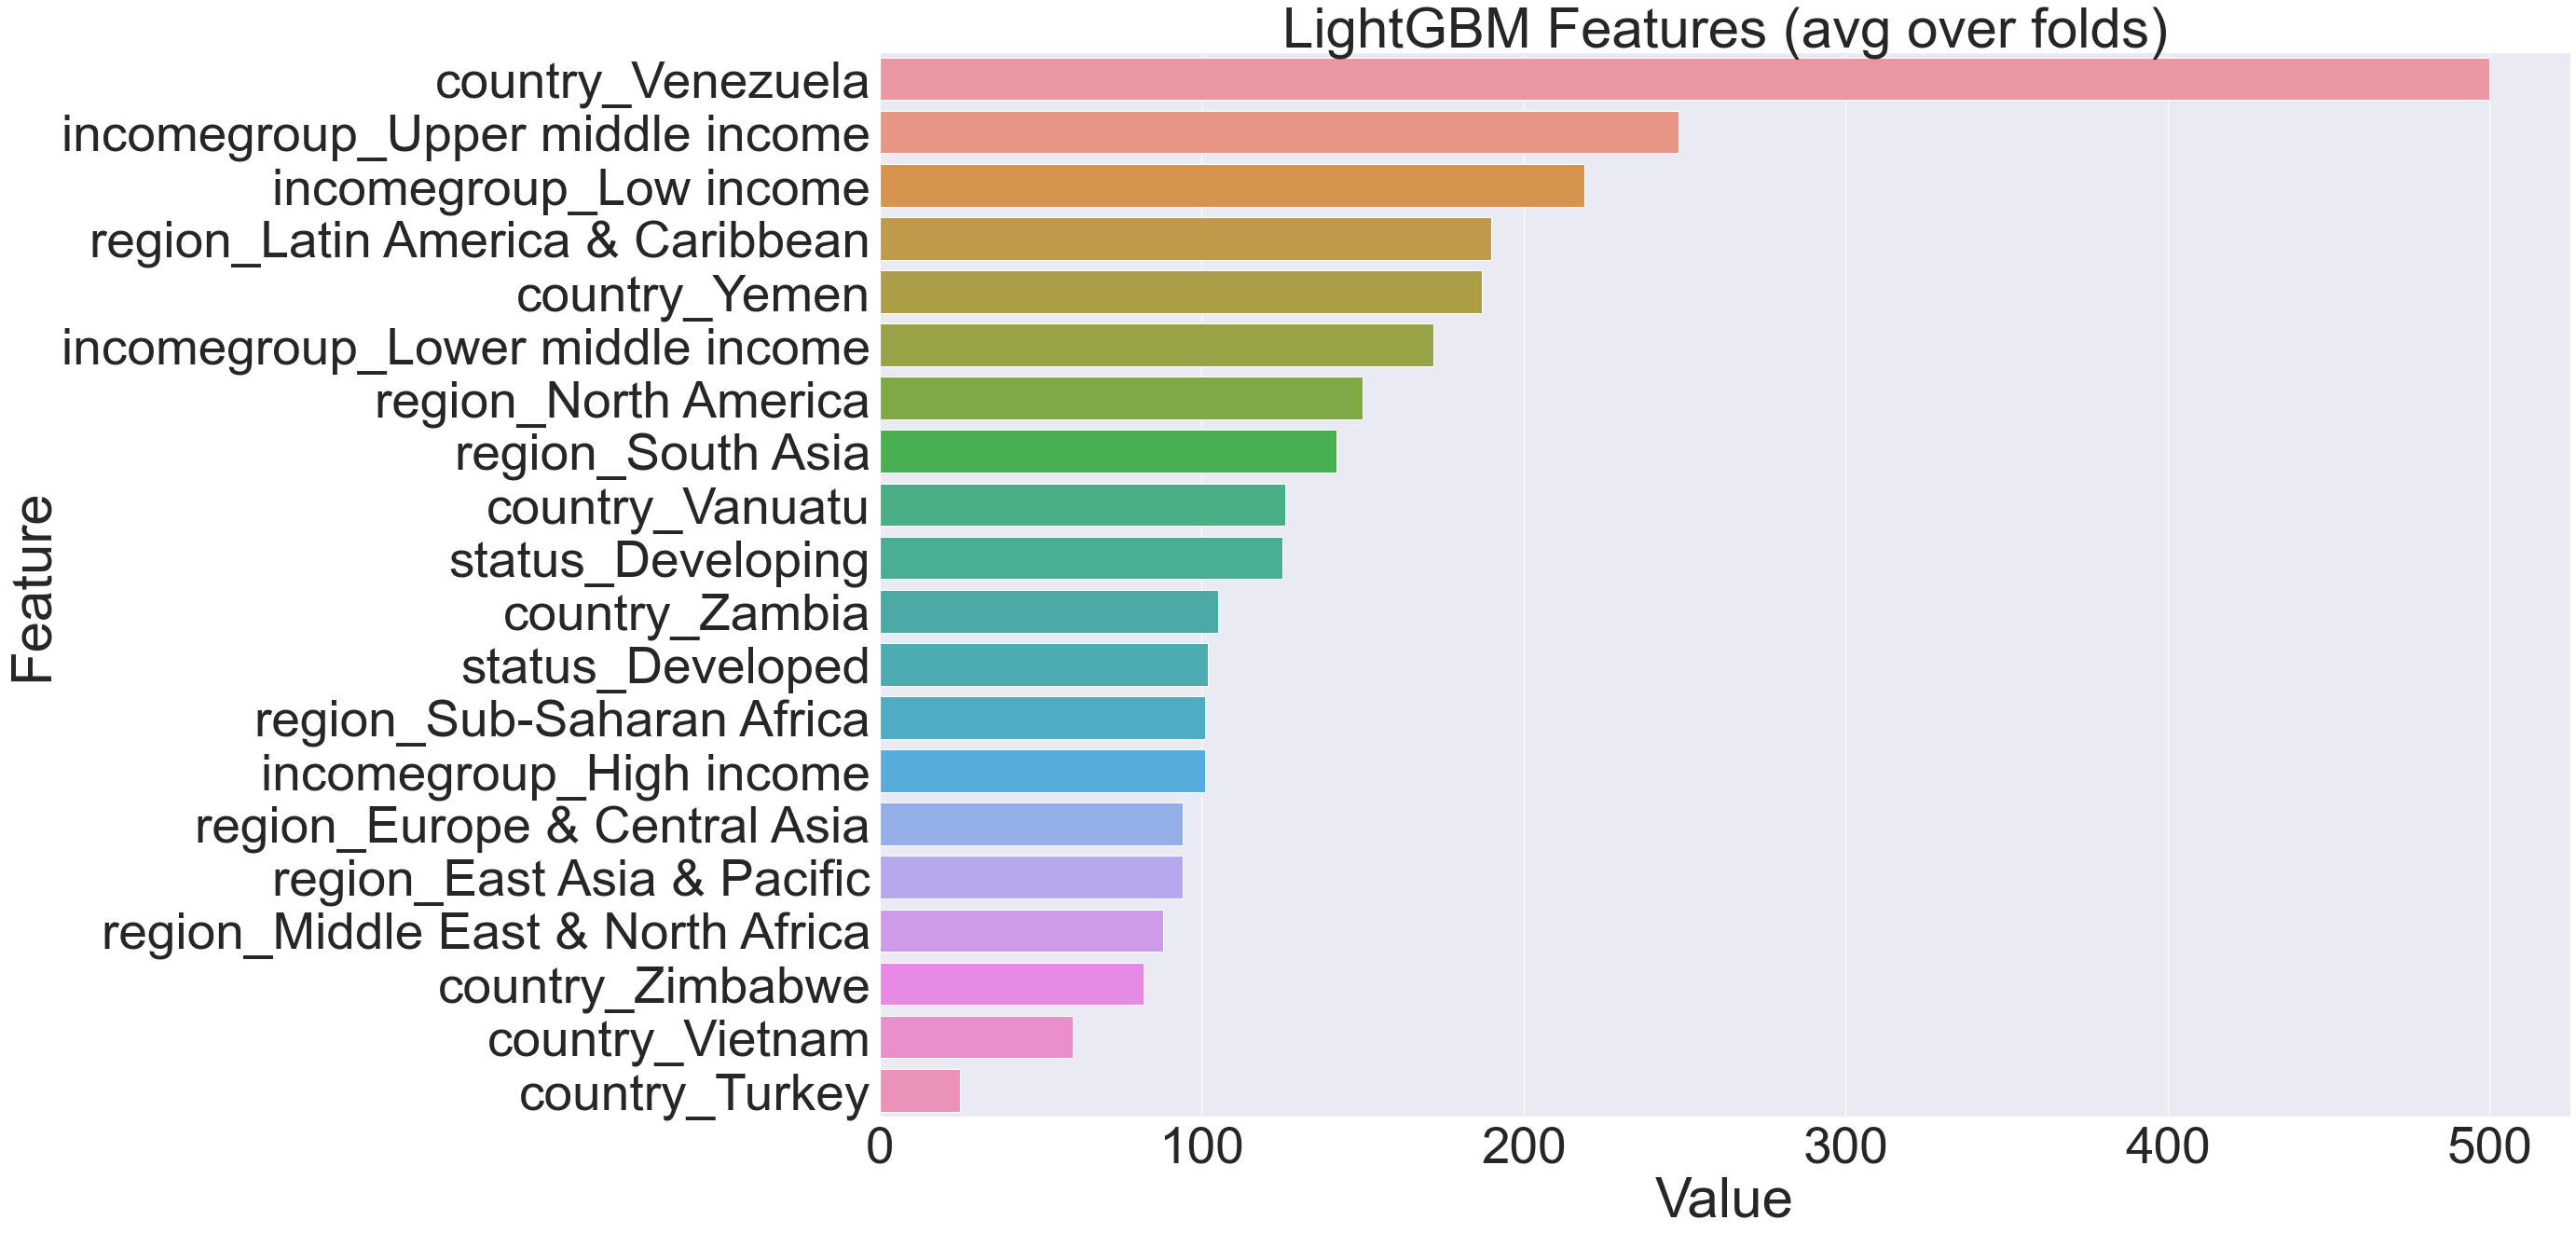

In [196]:
plotImp(pipeline_LGBM, X, num = 20)

In [197]:
for col in cat_features.columns:
    print(f'{col}-')
    print(cat_features[col].unique())

country-
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czech Republic' "Côte d'Ivoire"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Ki

In [198]:
num_cols

Index(['year', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling', 'Population'],
      dtype='object')

In [199]:
test_country = X_test['country'].unique()
train_country = X_train['country'].unique()

s = set(test_country)
diff = [x for x in train_country if x not in s]
print(diff)

['North Macedonia', 'Democratic Republic of the Congo', 'Philippines', 'Panama', 'Botswana', 'Zambia', 'Singapore', 'Croatia']


In [200]:
cat_cols

Index(['country', 'status', 'region', 'incomegroup'], dtype='object')

In [201]:
X.region.unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'East Asia & Pacific',
       'North America'], dtype=object)

In [202]:
X.incomegroup.unique()

array(['Low income', 'Upper middle income', 'Lower middle income',
       'High income'], dtype=object)

In [203]:
X_test.iloc[[3]]

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,region,incomegroup,Population
1397,Kuwait,2011,Developing,85.0,1,0.02,2785.097712,99.0,32,69.0,...,99.0,0.1,48268.5912,3.3,3.2,0.792,13.4,Middle East & North Africa,High income,3168054.0


In [204]:
pipeline_LGBM.predict(X_test.iloc[[3]])

array([74.10813857])

In [205]:
y_test[3]

74.2

In [206]:
X.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', "Côte d'Ivoire",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Gu

In [207]:
countries.country.unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Democratic Republic of the Congo', 'Congo', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Caribbean small states', 'Cuba',
       'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 

In [208]:
train_country = X_train['country'].unique()
country = life_expectancy.country.unique()

s = set(train_country)
diff = [x for x in country if x not in s]
print(diff)

['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru', 'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu']


In [209]:
'Finland' in X_train.country.unique()

True

In [210]:
df2.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,region,incomegroup,indicator_name,country_code,indicator_code,Population
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,17.2,17.3,0.479,10.1,South Asia,Low income,"Population, total",AFG,SP.POP.TOTL,34413603.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,17.5,17.5,0.476,10.0,South Asia,Low income,"Population, total",AFG,SP.POP.TOTL,33370804.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,17.7,17.7,0.470,9.9,South Asia,Low income,"Population, total",AFG,SP.POP.TOTL,32269592.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,17.9,18.0,0.463,9.8,South Asia,Low income,"Population, total",AFG,SP.POP.TOTL,31161378.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,18.2,18.2,0.454,9.5,South Asia,Low income,"Population, total",AFG,SP.POP.TOTL,30117411.0


In [211]:
df2.corr()['life_expectancy']

year                               0.171201
life_expectancy                    1.000000
adult_mortality                   -0.696217
infant_deaths                     -0.196754
alcohol                            0.404554
percentage_expenditure             0.381704
hepatitis_b                        0.257539
measles                           -0.157765
bmi                                0.567449
under-five_deaths                 -0.222735
polio                              0.466099
total_expenditure                  0.217589
diphtheria                         0.480047
hiv/aids                          -0.556869
gdp                                0.475305
thinness__1-19_years              -0.476880
thinness_5-9_years                -0.471291
income_composition_of_resources    0.724663
schooling                          0.752857
Population                         0.023789
Name: life_expectancy, dtype: float64

In [212]:
import pickle
#save the trained model
pickle.dump(pipeline_LGBM, open('models/pipeline_LGBM.pkl','wb'))

In [213]:
cat_cols

Index(['country', 'status', 'region', 'incomegroup'], dtype='object')

In [214]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2935
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2924 non-null   object 
 1   year                             2924 non-null   int64  
 2   status                           2924 non-null   object 
 3   life_expectancy                  2924 non-null   float64
 4   adult_mortality                  2924 non-null   float64
 5   infant_deaths                    2924 non-null   int64  
 6   alcohol                          2732 non-null   float64
 7   percentage_expenditure           2924 non-null   float64
 8   hepatitis_b                      2371 non-null   float64
 9   measles                          2924 non-null   int64  
 10  bmi                              2892 non-null   float64
 11  under-five_deaths                2924 non-null   int64  
 12  polio               

In [215]:
X.columns

Index(['country', 'year', 'status', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling', 'region', 'incomegroup',
       'Population'],
      dtype='object')

In [216]:
df_json = X_test.iloc[[3]].to_json(orient = 'records')

In [217]:
df_json

'[{"country":"Kuwait","year":2011,"status":"Developing","adult_mortality":85.0,"infant_deaths":1,"alcohol":0.02,"percentage_expenditure":2785.097712,"hepatitis_b":99.0,"measles":32,"bmi":69.0,"under-five_deaths":1,"polio":99.0,"total_expenditure":2.62,"diphtheria":99.0,"hiv\\/aids":0.1,"gdp":48268.5912,"thinness__1-19_years":3.3,"thinness_5-9_years":3.2,"income_composition_of_resources":0.792,"schooling":13.4,"region":"Middle East & North Africa","incomegroup":"High income","Population":3168054.0}]'

In [218]:
model = pickle.load(open('models/pipeline_LGBM.pkl','rb')) # load the data via pickle
X_test.iloc[[3]]

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,region,incomegroup,Population
1397,Kuwait,2011,Developing,85.0,1,0.02,2785.097712,99.0,32,69.0,...,99.0,0.1,48268.5912,3.3,3.2,0.792,13.4,Middle East & North Africa,High income,3168054.0


In [219]:
output = model.predict(X_test.iloc[[3]])
result = round(output[0], 2)
result

74.11

In [220]:
'The Life Expectancy is {} years'.format( result)

'The Life Expectancy is 74.11 years'

In [221]:
float(0.02)

0.02

In [228]:
X_test[X_test['country']== 'Nigeria'].iloc[[1]]

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,region,incomegroup,Population
1912,Nigeria,2011,Developing,375.0,513,8.75,187.573319,46.0,18843,22.8,...,48.0,4.7,2527.9423,11.0,1.9,0.5,9.6,Sub-Saharan Africa,Lower middle income,162805080.0


In [229]:
output = model.predict(X_test[X_test['country']== 'Nigeria'].iloc[[1]])
result = round(output[0], 2)
result

54.67

In [242]:
test = X_test.reset_index(drop = True)
test[test['country']== 'Nigeria']
output = model.predict(test.iloc[[440]])
result = round(output[0], 2)
result

52.33

In [239]:
test[test['country']== 'Nigeria']

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,region,incomegroup,Population
346,Nigeria,2013,Developing,367.0,498,8.30,194.203288,46.0,52852,24.1,...,46.0,3.9,2996.964320,1.4,1.2,0.514,9.8,Sub-Saharan Africa,Lower middle income,171765819.0
362,Nigeria,2011,Developing,375.0,513,8.75,187.573319,46.0,18843,22.8,...,48.0,4.7,2527.942300,11.0,1.9,0.500,9.6,Sub-Saharan Africa,Lower middle income,162805080.0
440,Nigeria,2008,Developing,386.0,536,9.30,105.591063,41.0,9960,21.0,...,53.0,5.0,1383.893354,12.0,11.9,0.481,9.2,Sub-Saharan Africa,Lower middle income,150269622.0
452,Nigeria,2002,Developing,49.0,571,9.61,17.137754,NaN,42007,17.8,...,25.0,5.3,459.457212,13.8,13.8,0.000,7.7,Sub-Saharan Africa,Lower middle income,128596079.0


In [243]:
y_test[440]

59.0

In [244]:
X_train[X_train['country']== 'Nigeria']

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,region,incomegroup,Population
1917,Nigeria,2006,Developing,396.0,549,9.66,10.357794,27.0,704,19.9,...,4.0,5.3,119.743286,12.6,12.6,0.466,9.0,Sub-Saharan Africa,Lower middle income,142538305.0
1918,Nigeria,2005,Developing,4.0,556,9.71,6.416253,18.0,110927,19.3,...,36.0,5.4,87.893874,12.9,12.9,0.463,8.9,Sub-Saharan Africa,Lower middle income,138865014.0
1919,Nigeria,2004,Developing,47.0,563,9.76,57.225558,NaN,31521,18.8,...,33.0,5.4,648.815852,13.2,13.2,0.445,8.5,Sub-Saharan Africa,Lower middle income,135320420.0
1920,Nigeria,2003,Developing,41.0,567,9.75,30.195508,NaN,141258,18.3,...,29.0,5.4,512.657190,13.5,13.6,0.000,8.1,Sub-Saharan Africa,Lower middle income,131900634.0
1922,Nigeria,2001,Developing,48.0,574,9.58,15.830985,NaN,168107,17.3,...,27.0,5.1,351.799667,14.1,14.1,0.000,8.0,Sub-Saharan Africa,Lower middle income,125394046.0
1913,Nigeria,2010,Developing,374.0,521,8.90,133.123087,49.0,8491,22.2,...,54.0,4.8,2327.326700,11.3,11.2,0.492,9.5,Sub-Saharan Africa,Lower middle income,158503203.0
1923,Nigeria,2000,Developing,45.0,576,9.23,22.481776,NaN,212183,16.9,...,29.0,4.9,379.119326,14.3,14.4,0.000,7.6,Sub-Saharan Africa,Lower middle income,122283853.0
1908,Nigeria,2015,Developing,344.0,483,NaN,0.000000,49.0,12423,25.4,...,49.0,3.7,2655.157977,9.8,9.7,0.525,10.0,Sub-Saharan Africa,Lower middle income,181137454.0
1916,Nigeria,2007,Developing,388.0,542,9.55,104.474644,42.0,2613,2.4,...,42.0,5.2,1136.829645,12.3,12.3,0.477,9.1,Sub-Saharan Africa,Lower middle income,146339971.0
1909,Nigeria,2014,Developing,362.0,490,0.01,263.211103,49.0,6855,24.7,...,49.0,3.9,3221.678128,1.1,9.9,0.521,10.0,Sub-Saharan Africa,Lower middle income,176404931.0
